# 19기 Clustering 정규세션 과제 - 19기 김은지

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. 데이터 파악

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [3]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [4]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [5]:
df['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

## 2. EDA

### 1. 단일변수 시각화
#### 1. 수치형 변수 histogram

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy. stats import mode
import numpy as np
from scipy import stats

In [32]:
# 한글깨짐 방지
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [7]:
category_feature = [ col for col in df.columns if df[col].dtypes == "object"]
#category_feature
numerical_feature = list(set(df.columns) - set(category_feature)) 
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='<U22')

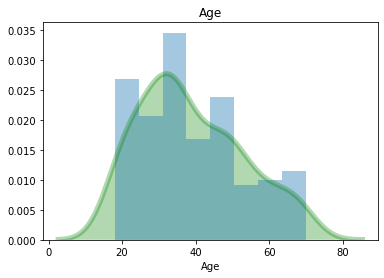

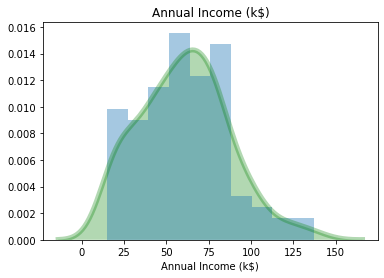

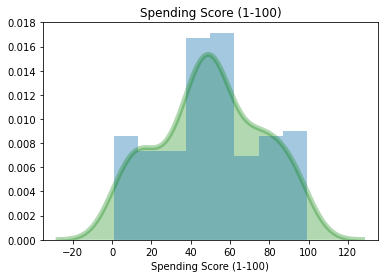

In [8]:
for i,col in enumerate(numerical_feature):
    sns.distplot(df.loc[df[col].notnull(), col], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})
    plt.title("%s histogram"%col, fontsize=20)
    plt.title(col)
    plt.show()

In [9]:
for i,col in enumerate(numerical_feature):
    max_value = df.loc[df[col].notnull(), col].max()
    min_value = df.loc[df[col].notnull(), col].min()
    
    print('%s의 범위 :'%col, min_value, '-', max_value)

Age의 범위 : 18 - 70
Annual Income (k$)의 범위 : 15 - 137
Spending Score (1-100)의 범위 : 1 - 99


수치형 변수는 3개로 나이, 연봉, 소비점수이다.<Br> 
각 변수는 크게 skew된 분포를 보이진 않았다.<br>
각 변수의 범위는 금액과 나이의 경우처럼 크게 차이나진 않지만 변수별로 범위가 상이하므로 클러스터링을 위해 스케일링을 통해 맞출 필요가 있다. 

#### 2. 수치형 변수 boxplot

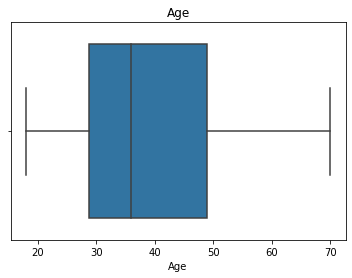

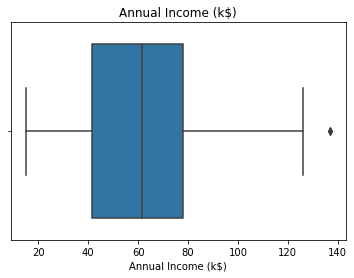

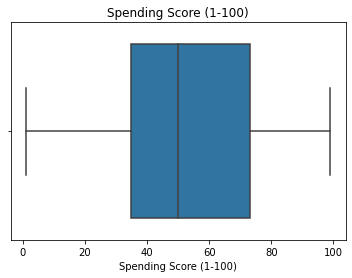

In [10]:
for i,col in enumerate(numerical_feature):
    sns.boxplot(df.loc[df[col].notnull(), col])
    plt.title("%s boxplot"%col, fontsize=20)
    plt.title(col)
    plt.show()

IQR 방식으로 이상치 확인

##### Annual Income (k$)

In [11]:
# 1. describe 확인
pd.DataFrame(df['Annual Income (k$)'].describe())

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


In [12]:
# 2. 최빈값 확인
pd.DataFrame(df['Annual Income (k$)'].value_counts()).head(10)

,Annual Income (k$)
54,12
78,12
60,6
87,6
62,6
63,6
71,6
48,6
33,4
19,4


평균은 36.923810
중위수는 36
최빈값은 35임을 알 수 있었음.
range는 18~60세

In [13]:
df['Annual Income (k$)'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75     78.00
0.80     78.20
0.90     93.40
0.95    103.00
0.99    126.11
Name: Annual Income (k$), dtype: float64

In [14]:
# 3. IQR 방식으로 이상치 확인
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  36.5
Q1 - 1.5*IQR =  -13.25
Q3 + 1.5*IQR =  132.75


In [15]:
len(df[df['Annual Income (k$)'] > (q3 + 1.5*iqr)])

2

Q3인 75%에 해당하는 값이 78이고, max가 137일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 78.2, 93.4, 103, 126.11 이었다.

MAX 값이 이상치 판단 기준 Q3 + 1.5*IQR 보다 크기 때문에 이상치라고 말할 수 있다.
Q3 + 1.5*IQR 보다 큰 데이터는 2개 존재함. 


결론 : Q3 + 1.5*IQR 보다 큰 이상치는 2개 존재.

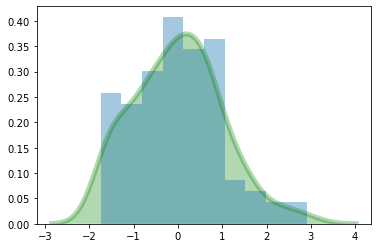

In [16]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(df['Annual Income (k$)']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

IQR 방식으로 이상치를 판단했을 때는 2개의 이상치가 존재했지만, 표준점수 방식을 사용했을 때는 이상치로 판단되는 값은 존재하지 않았다.<br>
따라서 그 둘을 이상치로 판단하지 않고 진행할 예정이다. <br>
∴ 이상치 없음<br>

#### 3. 범주형 변수 barplot

In [17]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [18]:
sns.set(font_scale = 5)

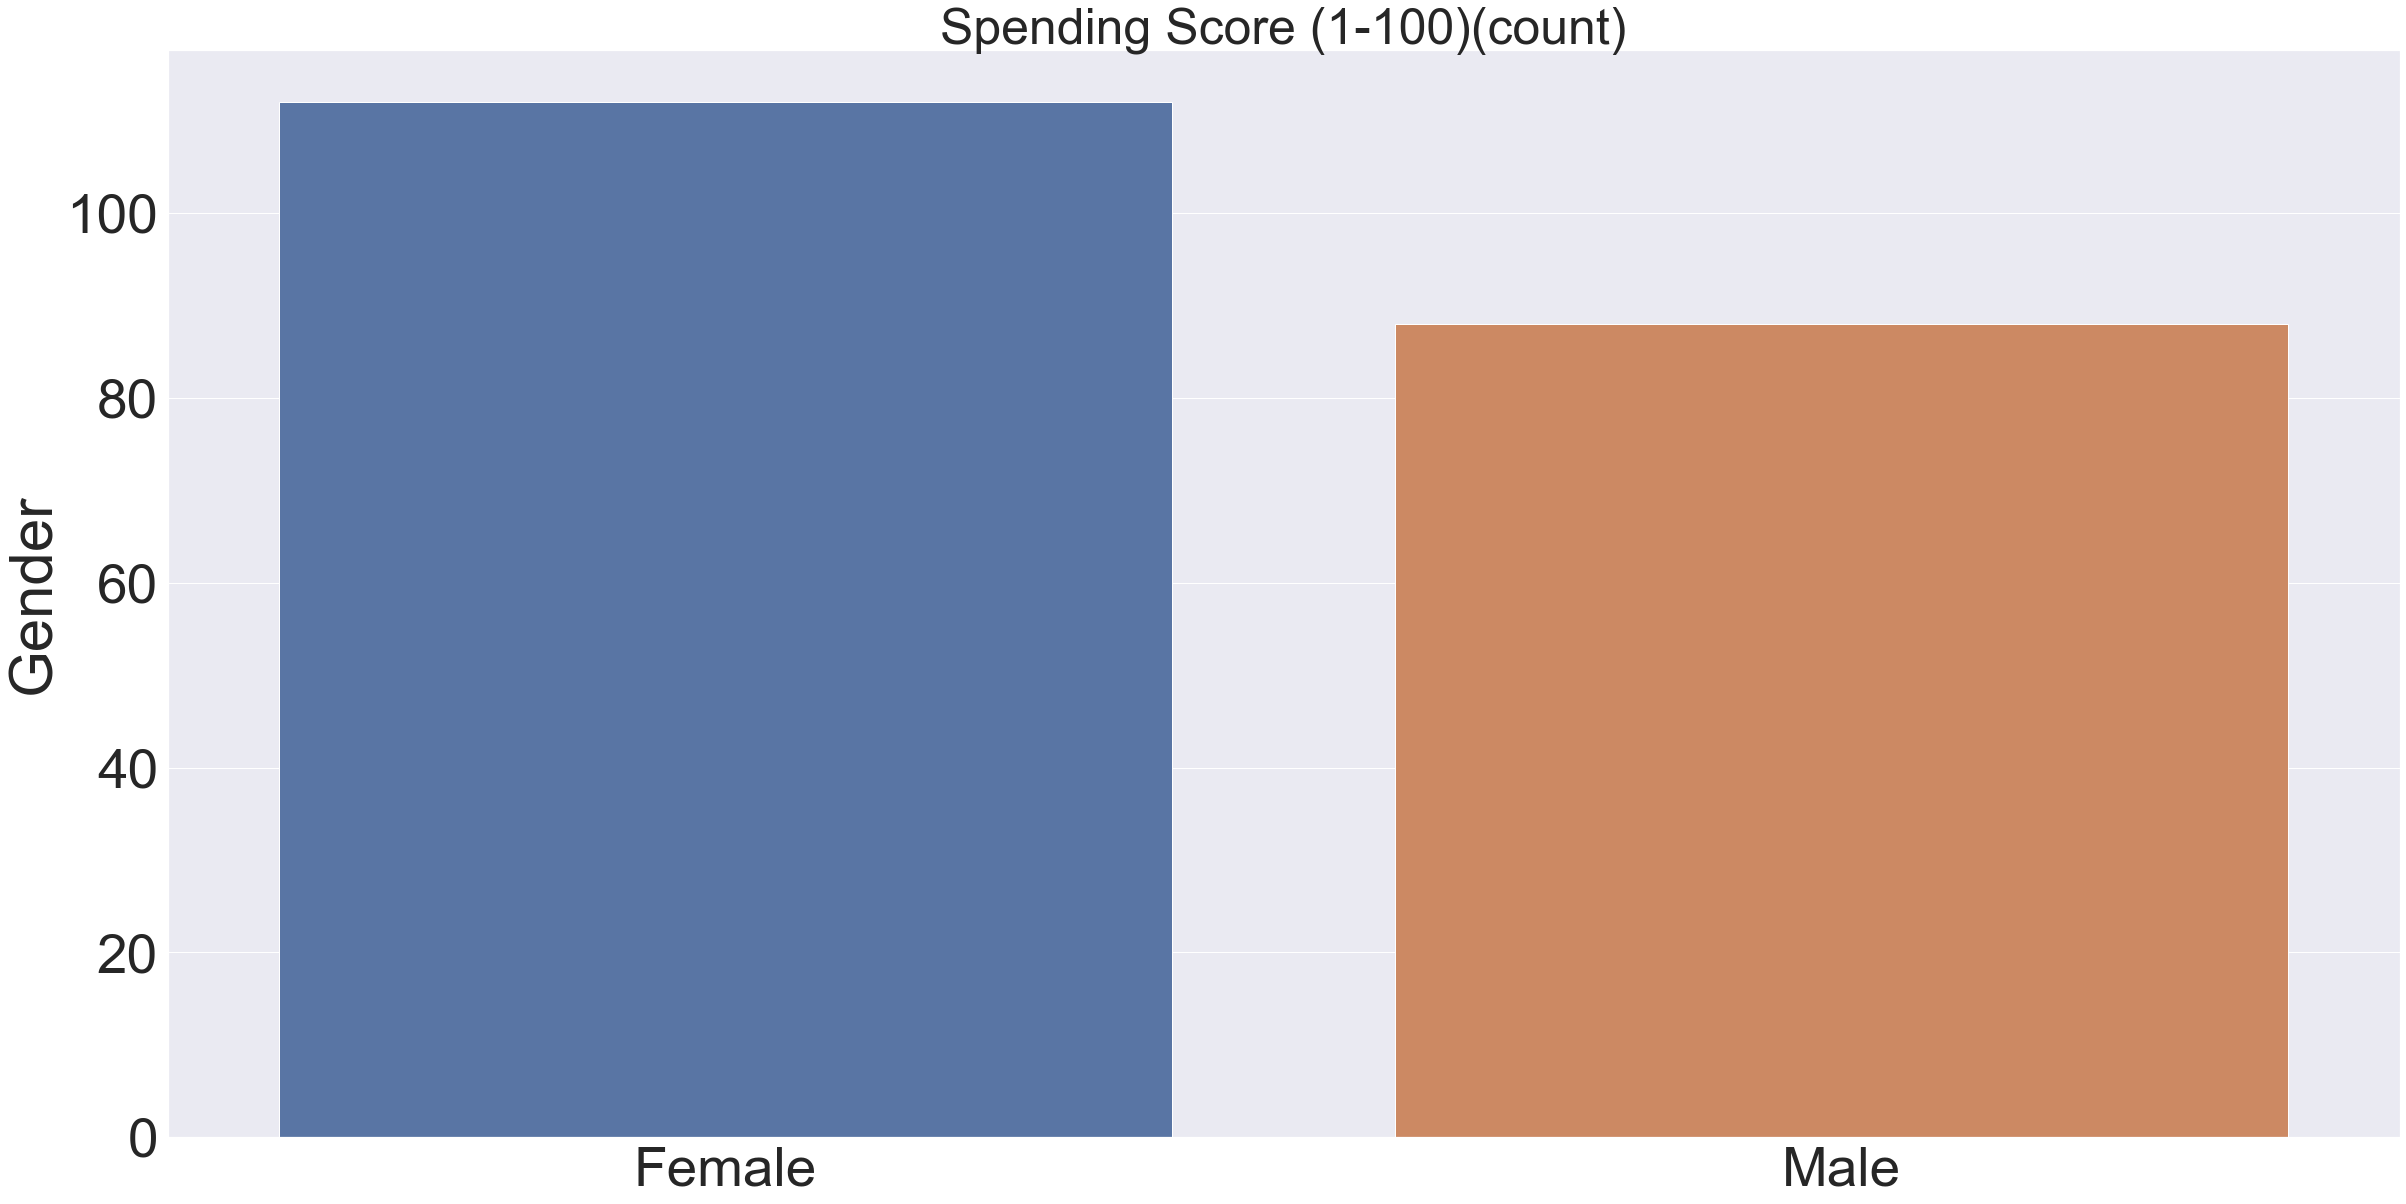

In [19]:
# 개수
vc_tmp = pd.DataFrame(df['Gender'].value_counts())
plt.figure(figsize=(40, 20), facecolor='white')
sns.barplot(x= vc_tmp.index, y=vc_tmp['Gender'])
plt.title("%s(count)"%col, fontsize=50)
plt.show()

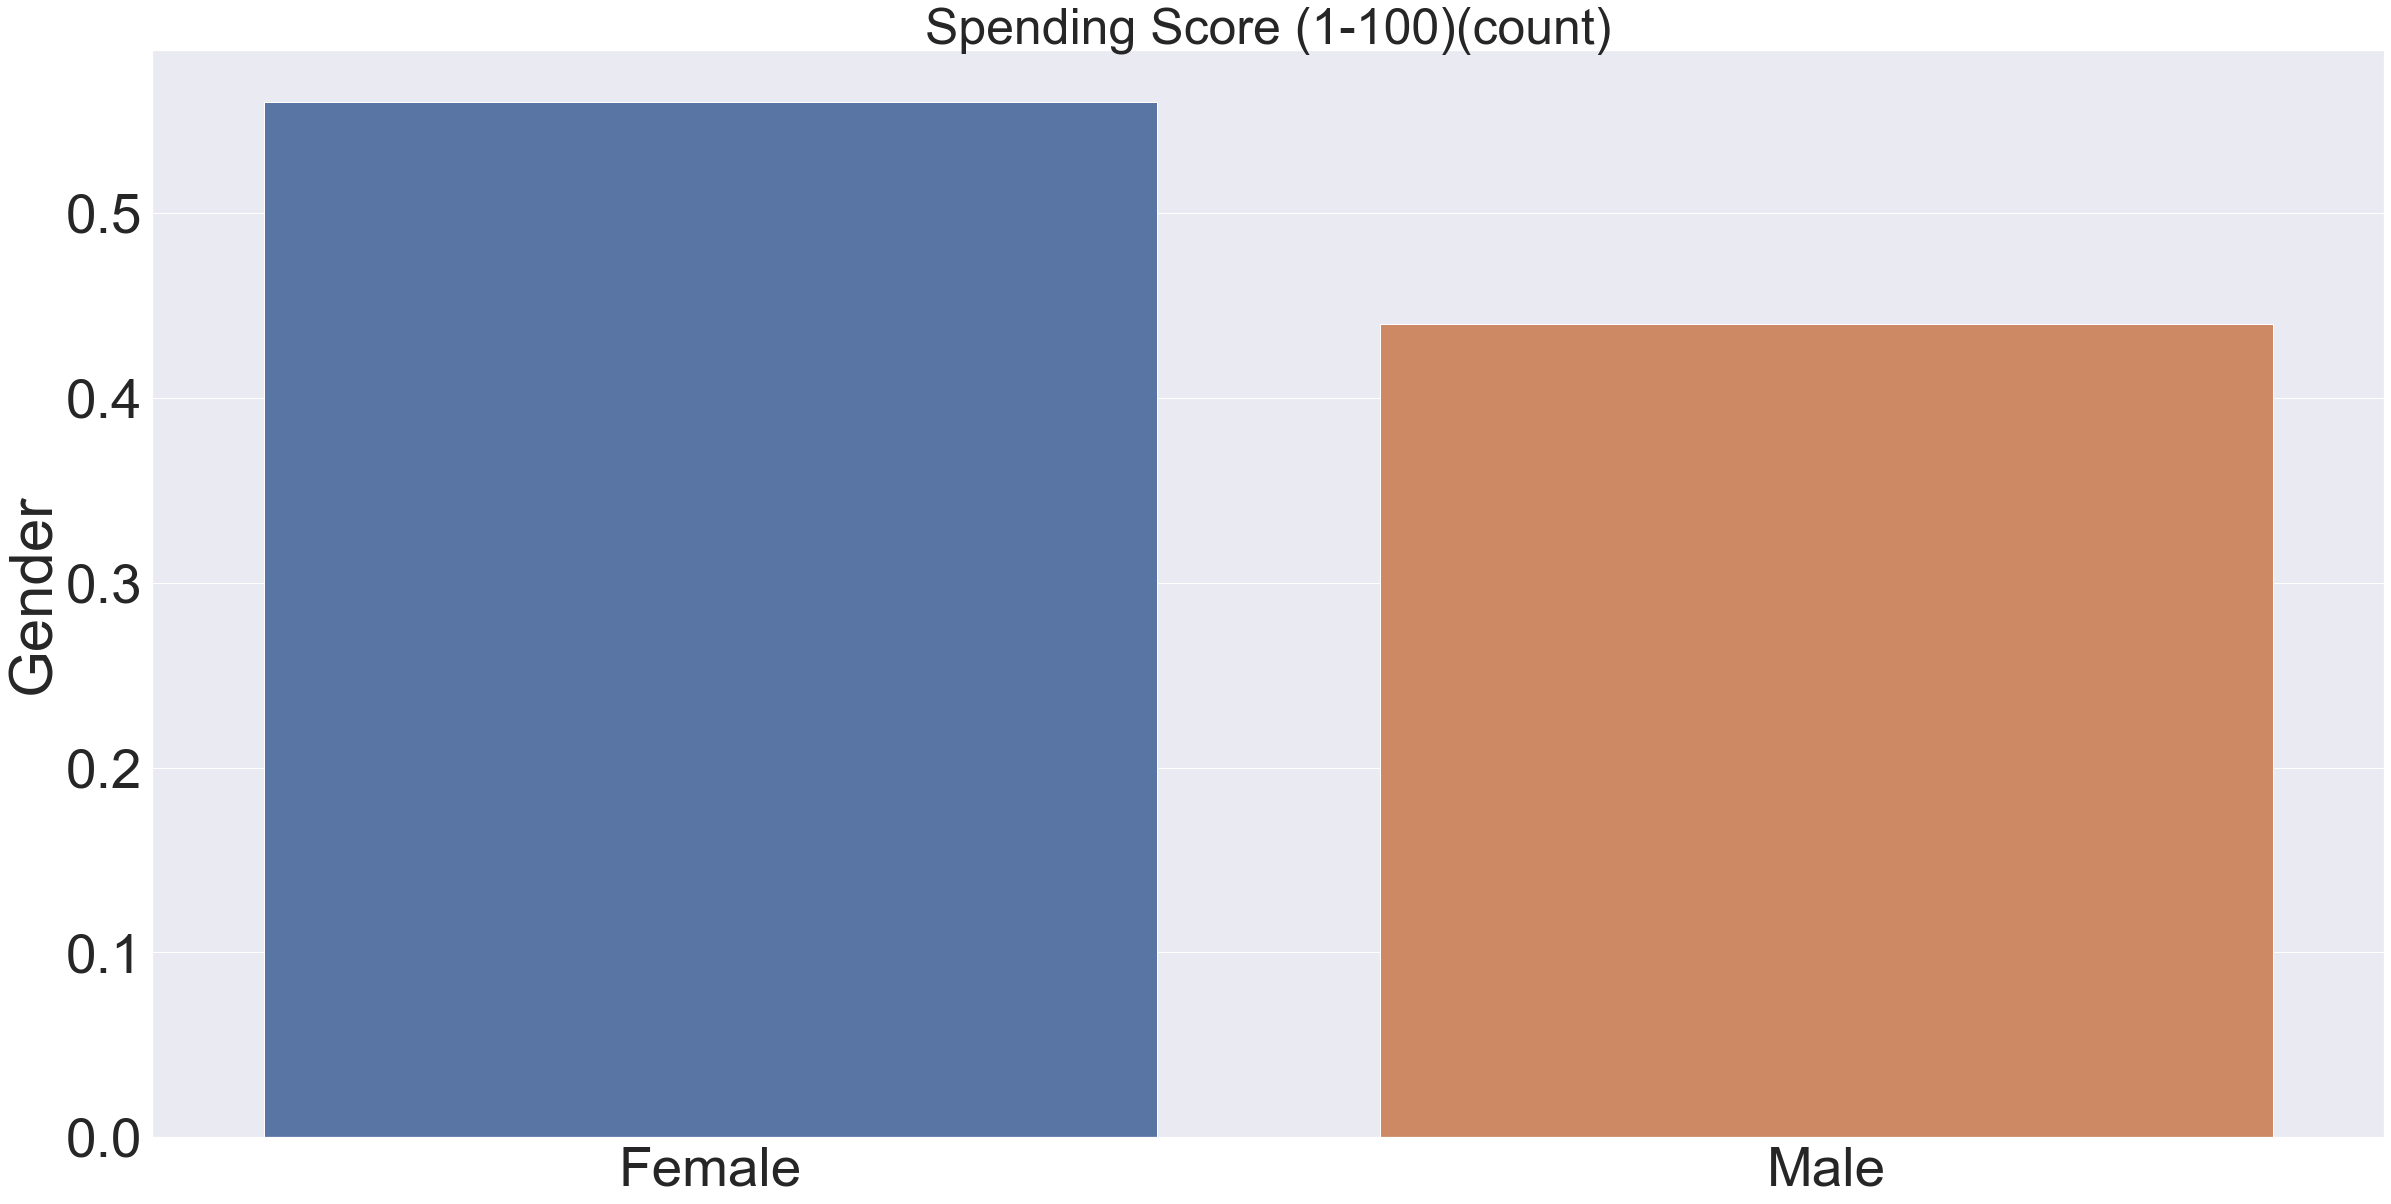

In [20]:
# 비율
vc_tmp = pd.DataFrame(df['Gender'].value_counts())
plt.figure(figsize=(40, 20), facecolor='white')
sns.barplot(x= vc_tmp.index, y=vc_tmp['Gender'] / sum(vc_tmp['Gender']))
plt.title("%s(count)"%col, fontsize=50)
plt.show()

#### 3. 범주형 변수 piechart

In [21]:
sns.set()

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


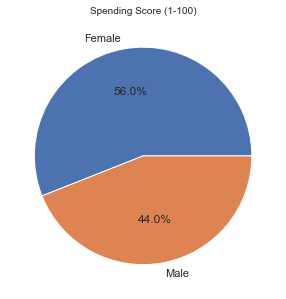

In [22]:
vc_tmp = pd.DataFrame(df['Gender'].value_counts())
plt.figure(figsize=(5, 5), facecolor='white')
plt.pie(vc_tmp, labels=vc_tmp.index, autopct='%.1f%%')
plt.title("%s"%col, fontsize=10)
plt.show()

범주형 변수 Gender의 분포를 barplot, piechart로 확인해본 결과 Female이 56%, Male이 44%로 Female이 12% 더 많이 존재함을 알 수 있었다.

### 2. 두개 이상의 변수 시각화

- 성별에 따른 나이

In [31]:
sns.set(font_scale = 5)

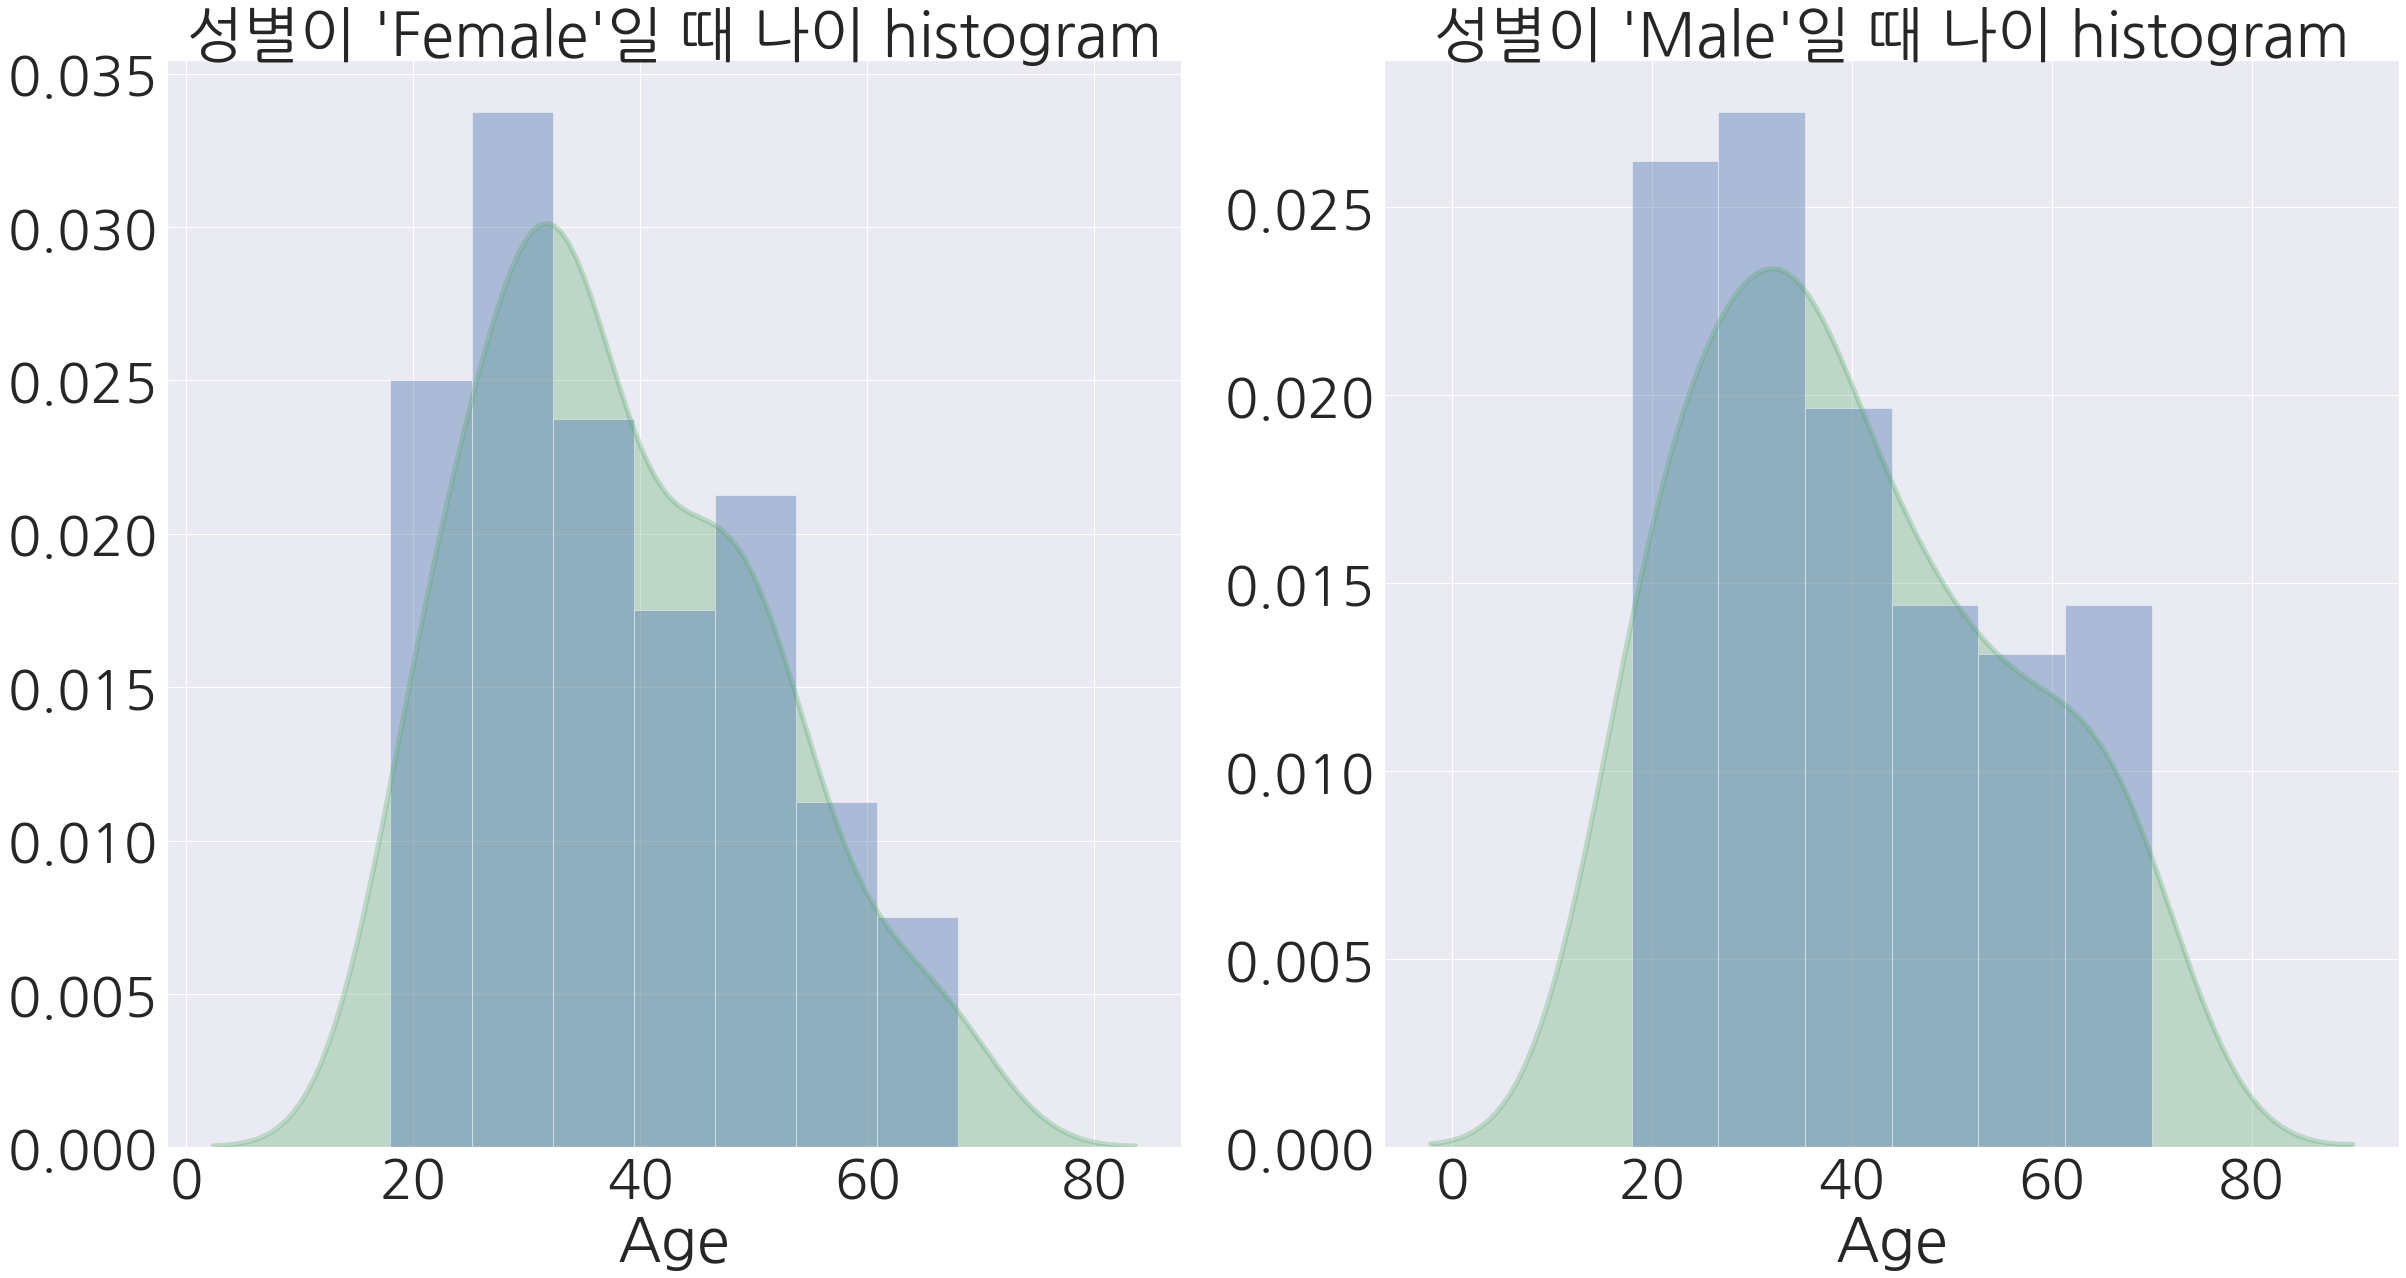

In [33]:
plt.figure(figsize=(40, 20), facecolor='white')

for i, x in enumerate(['Female','Male']):
    plt.subplot(1,2,i+1)
    sns.distplot(df.loc[df['Gender']==x,'Age'], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})
    plt.title("성별이 '%s'일 때 나이 histogram"%x, fontsize=60)

성별에 따른 나이 히스토그램을 확인했을 때 여성은 30대, 50대, 20대 순으로 많았으며, 남성은 30대, 20대, 40대 순으로 많았다. 대체로 데이터에서 남성 집단이 젊은 편임을 알 수 있다.

- 성별에 따른 연봉

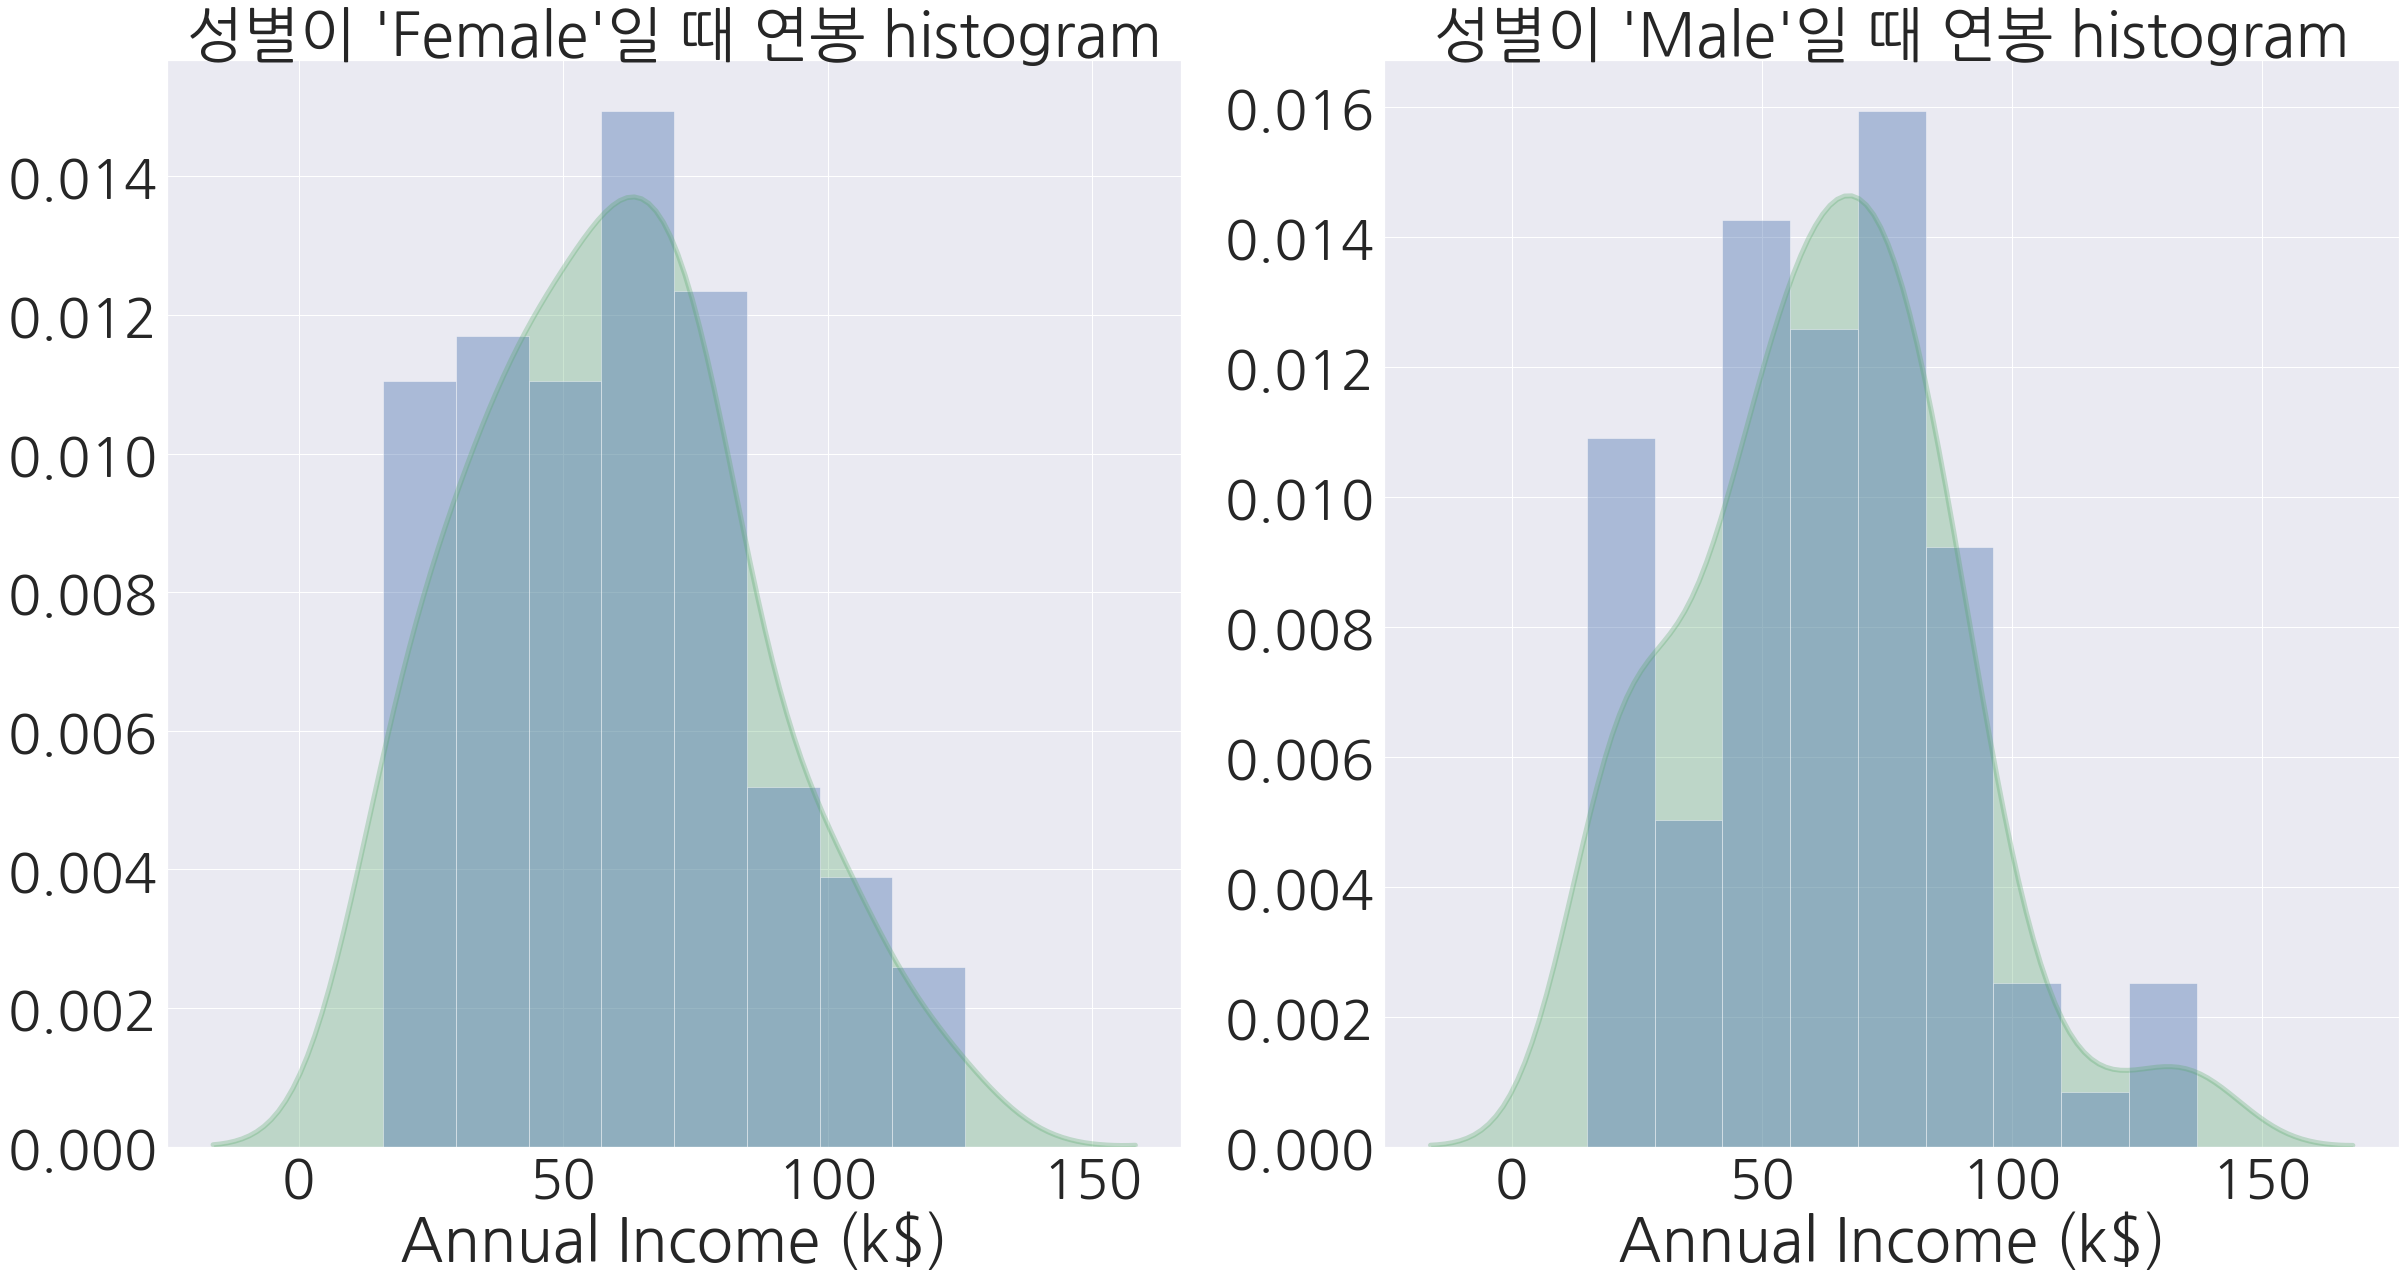

In [36]:
plt.figure(figsize=(40, 20), facecolor='white')

for i, x in enumerate(['Female','Male']):
    plt.subplot(1,2,i+1)
    sns.distplot(df.loc[df['Gender']==x,'Annual Income (k$)'], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})
    plt.title("성별이 '%s'일 때 연봉 histogram"%x, fontsize=60)

성별에 따른 연봉 히스토그램을 확인했을 때 여성의 데이터는 연봉이 30 ~ 80에 주로 분포하고 있으며, 남성의 데이터는 50 ~ 80, 30~40에 주로 분포함을 확인할 수 있었다. 특이한 점은 여성의 경우 범위 구간마다 연속적으로 증가 혹은 감소하는 경향을 보였다면, 남성의 경우 특정 범위 구간에서 급감 또는 급등하는 경향을 보였다.

- 성별에 따른 소비지수

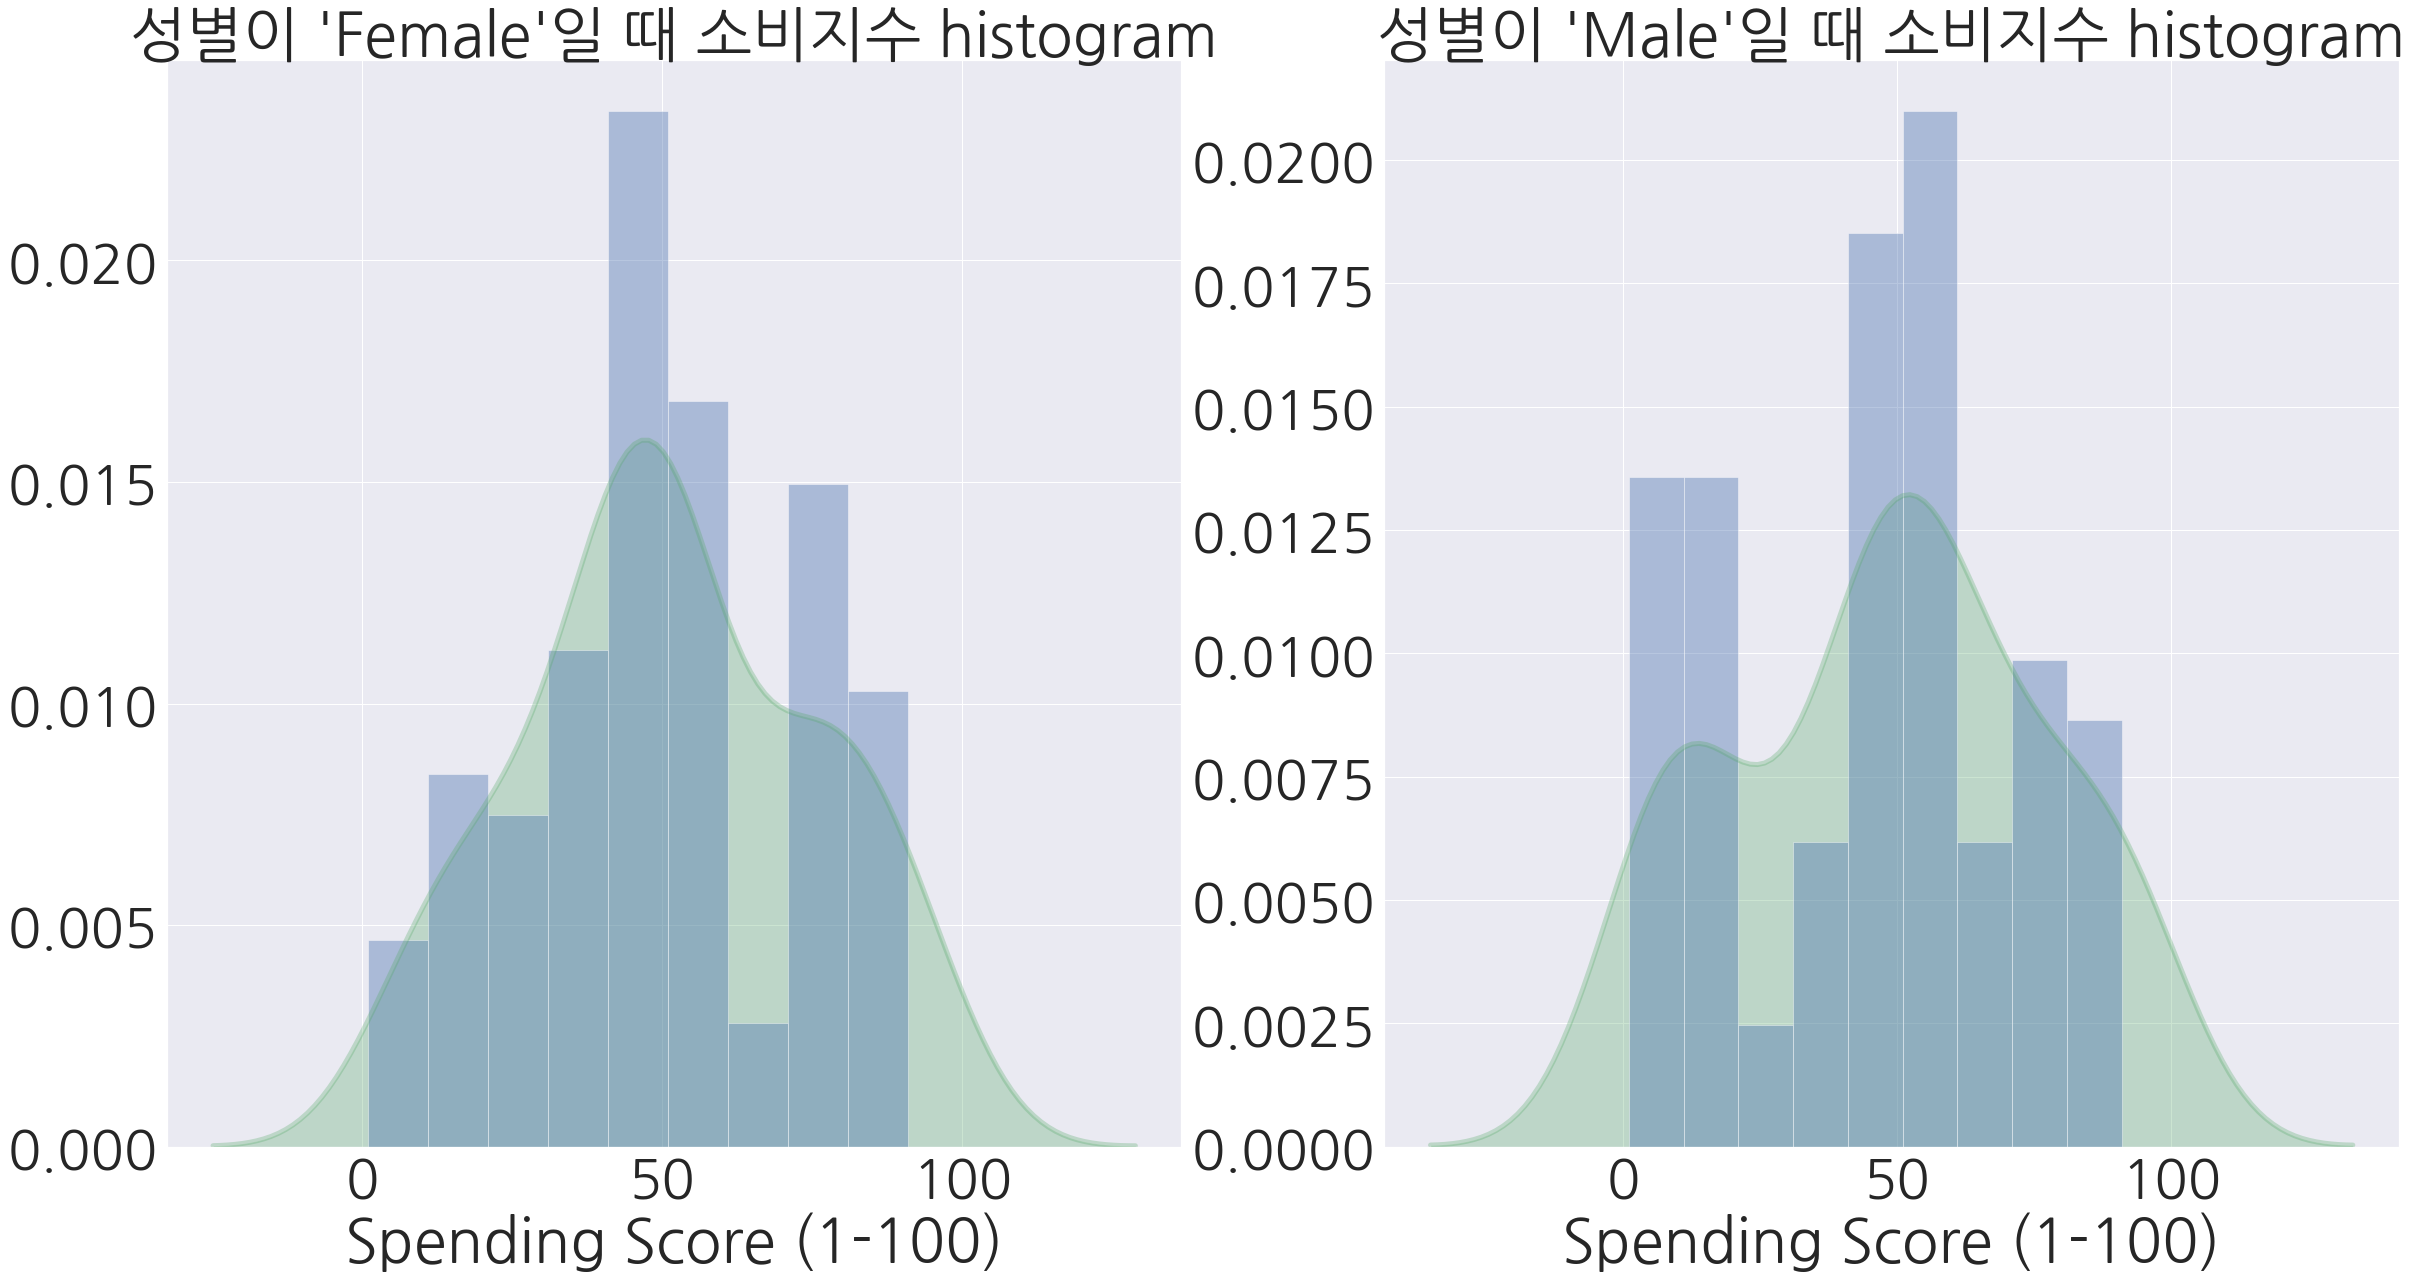

In [42]:
plt.figure(figsize=(40, 20), facecolor='white')

for i, x in enumerate(['Female','Male']):
    plt.subplot(1,2,i+1)
    sns.distplot(df.loc[df['Gender']==x,'Spending Score (1-100)'], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True}, bins=range(1,100,10))
    plt.title("성별이 '%s'일 때 소비지수 histogram"%x, fontsize=60)

성별에 따른 소비지수 히스토그램을 확인했을 때 여성은 40 ~ 50 사이의 값이 가장 많았으며, 남성은 50 ~ 60 사이의 값이 가장 많았다. 여성의 경우 60 ~ 70 사이의 값이 가장 적었으며, 남성의 경우 20 ~ 30 사이의 값이 가장 적었다. 남성의 경우, 다봉분포 형태를 보였는데, 0 ~ 20 사이의 값이 50 ~ 70 사이의 값 다음으로 많은 것이 특이한 점이었다.

## 3. Preprocessing
전처리 단계에서는 먼저 train, test data를 나눈 후 scaling을 진행한다. clustering의 경우 거리계산을 진행하기 때문에 scaling이 필요하다(변수끼리 스케일 차이가 크게 벌어지면 스케일이 큰 변수의 영향력이 상대적으로 커지기 때문에 분석 결과가 잘못될 가능성이 높기 때문). 따라서 수치형 변수들을 scaling한 후 범주형 변수인 gender를 one hot encoding으로 바꿔주는 작업을 수행한다.

#### 1. train, test data split

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 808)
train_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
86,Male,48,54,46
162,Female,29,79,83
78,Male,40,54,48
89,Female,34,58,60
25,Female,54,28,14
...,...,...,...,...
143,Female,28,76,40
198,Male,32,126,74
85,Female,21,54,57


In [182]:
test_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
87,Female,55,57,58
77,Female,45,54,53
6,Female,22,17,76
84,Female,46,54,44
170,Male,32,87,63


#### 2. one-hot encoding

In [183]:
train_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
86,Male,48,54,46
162,Female,29,79,83
78,Male,40,54,48
89,Female,34,58,60
25,Female,54,28,14
...,...,...,...,...
143,Female,28,76,40
198,Male,32,126,74
85,Female,21,54,57


In [184]:
train_df = pd.get_dummies(train_df, columns = ["Gender"])
test_df = pd.get_dummies(test_df, columns = ["Gender"])
train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
86,48,54,46,0,1
162,29,79,83,1,0
78,40,54,48,0,1
89,34,58,60,1,0
25,54,28,14,1,0
...,...,...,...,...,...
143,28,76,40,1,0
198,32,126,74,0,1
85,21,54,57,1,0


In [185]:
train_df.reset_index(inplace=True)
train_df.drop(['CustomerID'],axis=1,inplace=True)
train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,48,54,46,0,1
1,29,79,83,1,0
2,40,54,48,0,1
3,34,58,60,1,0
4,54,28,14,1,0
...,...,...,...,...,...
155,28,76,40,1,0
156,32,126,74,0,1
157,21,54,57,1,0
158,38,67,40,1,0


In [186]:
test_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
87,55,57,58,1,0
77,45,54,53,1,0
6,22,17,76,1,0
84,46,54,44,1,0
170,32,87,63,0,1


In [187]:
test_df.reset_index(inplace=True)
test_df.drop(['CustomerID'],axis=1,inplace=True)
test_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,55,57,58,1,0
1,45,54,53,1,0
2,22,17,76,1,0
3,46,54,44,1,0
4,32,87,63,0,1


#### 2. scaling
파이썬의 sklearn 라이브러리의 scaler는 대표적으로 3가지가 존재한다.
1. Standard Scaler
    - 각 변수의 평균을 0, 분산을 1로 변경하여 모든 변수의 크기가 같게 함.
    - 변수의 최소값과 최대값을 제한하지 않음
    - 평균과 분산을 이용하기 때문에 이상치가 있을 경우 데이터 분포에 영향을 미치게 됨.
2. Minmax Scaler
    - 모든 변수가 정확하게 0과 1 사이에 위치하도록 함.
    - Standard Scaler와 다르게 변수의 최소값과 최대값을 0과 1로 한정함.
    - 하지만 Standard Scaler와 마찬가지로 이상치에 민감함.
3. Robust Scaler
    - Standard Scaler와 Minmax Scaler와는 다르게 이상치에 덜 민감함.
    - 평균이 아닌 중앙값과 사분위 값을 사용함.

In [173]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [188]:
sns.set()

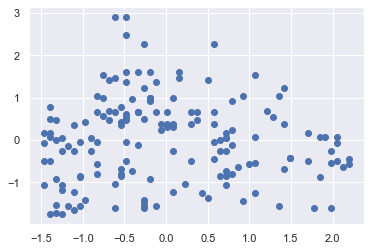

In [189]:
# 1. Standard Scaler
std_scaler = StandardScaler()
std_train_df = std_scaler.fit_transform(train_df)
std_test_df = std_scaler.fit_transform(test_df)
plt.scatter(std_train_df[:,0],std_train_df[:,1])

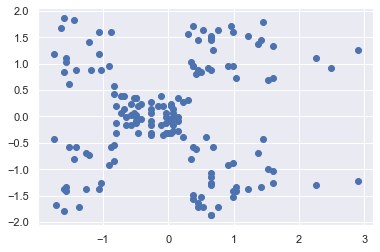

In [190]:
plt.scatter(std_train_df[:,1],std_train_df[:,2])

In [191]:
std_train_df = pd.DataFrame(data = std_train_df, columns = train_df.columns)
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159
1,-0.688276,0.689191,1.255977,0.848782,-0.848782
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782
...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782
156,-0.477310,2.486249,0.912136,-1.178159,1.178159
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782


In [193]:
std_test_df = pd.DataFrame(data = std_test_df, columns = test_df.columns)
std_test_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1.249839,-0.072207,0.312229,1.051315,-1.051315
1,0.463777,-0.186218,0.104076,1.051315,-1.051315
2,-1.344167,-1.592350,1.061579,1.051315,-1.051315
3,0.542383,-0.186218,-0.270599,1.051315,-1.051315
4,-0.558104,1.067901,0.520382,-0.951190,0.951190


scaling 된 것을 확인

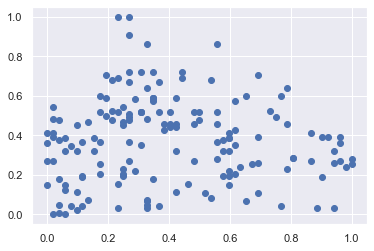

In [194]:
# 2. MinMax Scaler
mm_train_scaler = MinMaxScaler()
mm_train_scaler.fit(train_df)
mm_train_df = mm_train_scaler.transform(train_df)

plt.scatter(mm_train_df[:,0],mm_train_df[:,1])

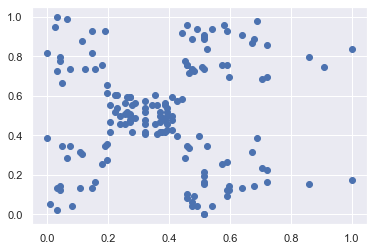

In [195]:
plt.scatter(mm_train_df[:,1],mm_train_df[:,2])

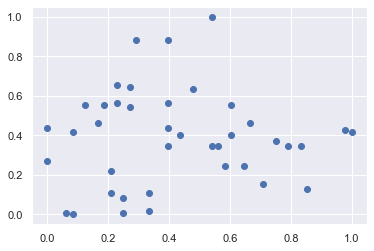

In [196]:
mm_test_scaler = MinMaxScaler()
mm_test_scaler.fit(test_df)
mm_test_df = mm_test_scaler.transform(test_df)

plt.scatter(mm_test_df[:,0],mm_test_df[:,1])

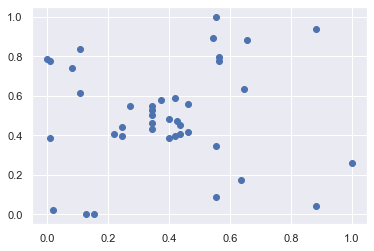

In [197]:
plt.scatter(mm_test_df[:,1],mm_test_df[:,2])

In [198]:
mm_train_df = pd.DataFrame(data = mm_train_df, columns = train_df.columns)
mm_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.576923,0.319672,0.459184,0.0,1.0
1,0.211538,0.524590,0.836735,1.0,0.0
2,0.423077,0.319672,0.479592,0.0,1.0
3,0.307692,0.352459,0.602041,1.0,0.0
4,0.692308,0.106557,0.132653,1.0,0.0
...,...,...,...,...,...
155,0.192308,0.500000,0.397959,1.0,0.0
156,0.269231,0.909836,0.744898,0.0,1.0
157,0.057692,0.319672,0.571429,1.0,0.0
158,0.384615,0.426230,0.397959,1.0,0.0


In [199]:
mm_test_df = pd.DataFrame(data = mm_test_df, columns = test_df.columns)
mm_test_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.750000,0.372727,0.580645,1.0,0.0
1,0.541667,0.345455,0.526882,1.0,0.0
2,0.062500,0.009091,0.774194,1.0,0.0
3,0.562500,0.345455,0.430108,1.0,0.0
4,0.270833,0.645455,0.634409,0.0,1.0
5,0.000000,0.436364,0.451613,0.0,1.0
6,0.000000,0.272727,0.548387,0.0,1.0
7,0.833333,0.345455,0.462366,0.0,1.0
8,0.083333,0.000000,0.784946,1.0,0.0
9,0.208333,0.218182,0.408602,1.0,0.0


0과 1 사이의 범위로 scaling 된 것을 확인

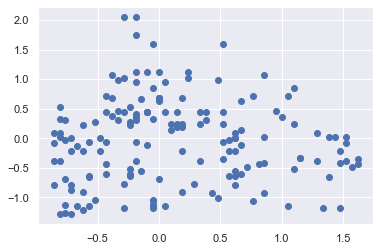

In [200]:
# 3. Robust Scaler
rb_train_scaler = RobustScaler()
rb_train_scaler.fit(train_df)
rb_train_df = rb_train_scaler.transform(train_df)

plt.scatter(rb_train_df[:,0],rb_train_df[:,1])

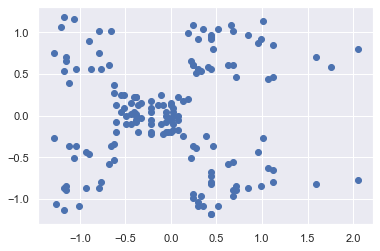

In [201]:
plt.scatter(rb_train_df[:,1],rb_train_df[:,2])

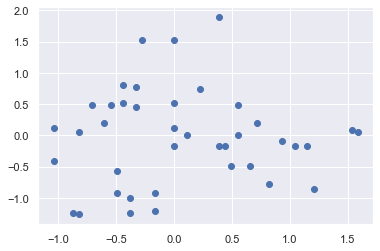

In [202]:
rb_test_scaler = RobustScaler()
rb_test_scaler.fit(test_df)
rb_test_df = rb_test_scaler.transform(test_df)

plt.scatter(rb_test_df[:,0],rb_test_df[:,1])

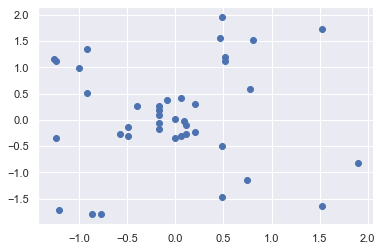

In [203]:
plt.scatter(rb_test_df[:,1],rb_test_df[:,2])

In [204]:
rb_train_df = pd.DataFrame(data = rb_train_df, columns = train_df.columns)
rb_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.571429,-0.219178,-0.096970,-1.0,1.0
1,-0.333333,0.465753,0.800000,0.0,0.0
2,0.190476,-0.219178,-0.048485,-1.0,1.0
3,-0.095238,-0.109589,0.242424,0.0,0.0
4,0.857143,-0.931507,-0.872727,0.0,0.0
...,...,...,...,...,...
155,-0.380952,0.383562,-0.242424,0.0,0.0
156,-0.190476,1.753425,0.581818,-1.0,1.0
157,-0.714286,-0.219178,0.169697,0.0,0.0
158,0.095238,0.136986,-0.242424,0.0,0.0


In [205]:
rb_test_df = pd.DataFrame(data = rb_test_df, columns = test_df.columns)
rb_test_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.931507,-0.086331,0.383838,1.0,-1.0
1,0.383562,-0.172662,0.181818,1.0,-1.0
2,-0.876712,-1.237410,1.111111,1.0,-1.0
3,0.438356,-0.172662,-0.181818,1.0,-1.0
4,-0.328767,0.776978,0.585859,0.0,0.0


scaling 된 것을 확인

# 4. Clustering
Agglomerative Hierarchical Clustering, K-means Clustering, DBSCAN Clusering 진행

### 2.1 Agglomerative Hierarchical Clustering

In [206]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean') # 거리 측도:유클리디안, 군집 개수:4개
model.fit(std_train_df)

AgglomerativeClustering(n_clusters=4)

In [207]:
colors=['purple','red','blue','green']

In [208]:
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159
1,-0.688276,0.689191,1.255977,0.848782,-0.848782
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782
...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782
156,-0.477310,2.486249,0.912136,-1.178159,1.178159
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782


In [209]:
import matplotlib.pyplot as plt
import matplotlib

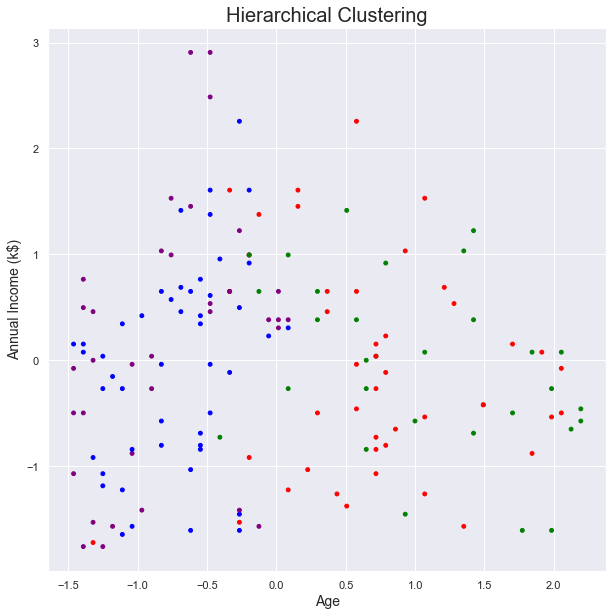

In [210]:
std_train_df['HR_labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,1],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[1],fontsize=14)
plt.show()

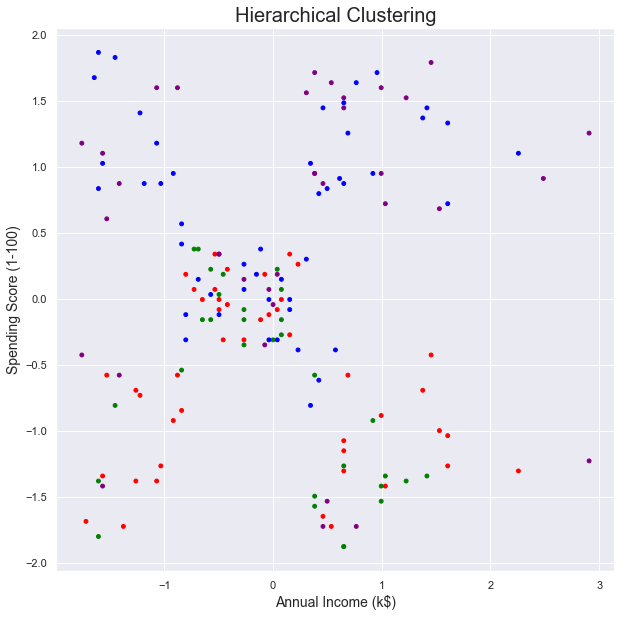

In [211]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,1],std_train_df.iloc[:,2],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[1],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

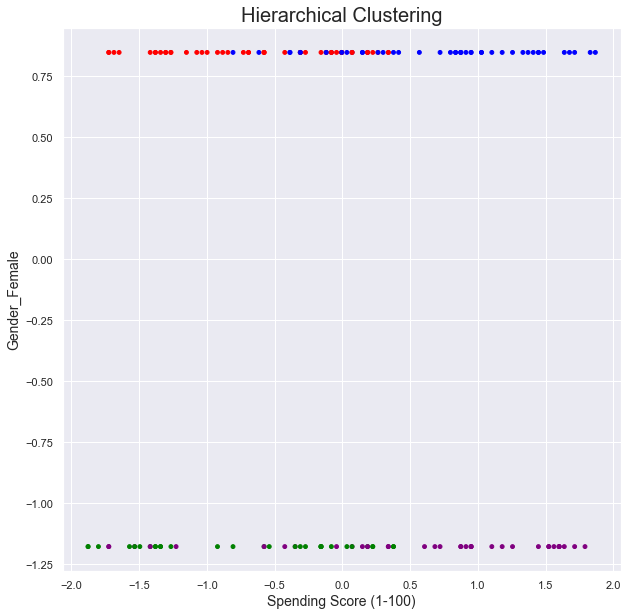

In [212]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,2],std_train_df.iloc[:,3],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[2],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[3],fontsize=14)
plt.show()

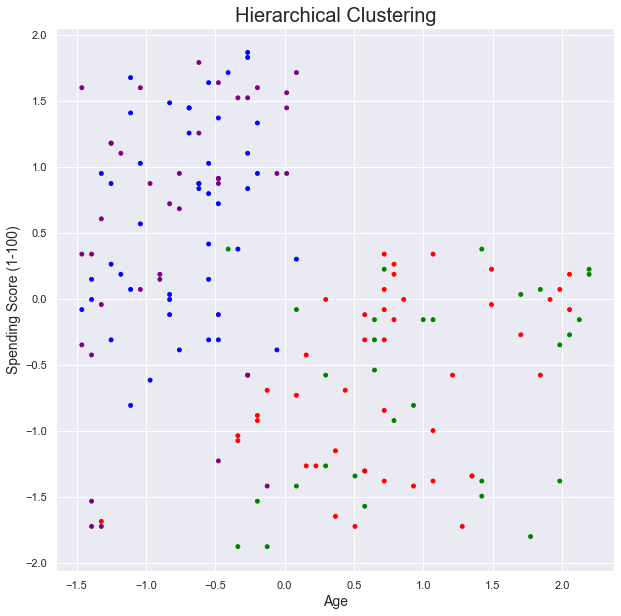

In [213]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,2],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

#### 실루엣 계수 확인
실루엣 계수는 각 데이터별로 그 데이터가 속한 군집 내의 거리기반 유사도와 인접한 군집의 유사도를 비교하는 지표. 0.5보다 크면 타당하다고 판단 가능

In [214]:
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,HR_labels
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159,3
1,-0.688276,0.689191,1.255977,0.848782,-0.848782,2
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159,3
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782,2
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782,1
...,...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782,2
156,-0.477310,2.486249,0.912136,-1.178159,1.178159,0
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782,2
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782,2


In [215]:
std_train_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female',
       'Gender_Male', 'HR_labels'],
      dtype='object')

In [216]:
from sklearn.metrics import silhouette_score

mean_score = silhouette_score(std_train_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Female','Gender_Male']], std_train_df['HR_labels'])
print(mean_score)

0.3208050690620223


0.3208로 매우 작은 값임을 확인. 따라서 해당 클러스터링은 적절하지 않다고 판단. <br>
 => 클러스터 개수를 변경

- n_cluster = 5

In [217]:
std_train_df.drop(['HR_labels'], axis=1, inplace=True)
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159
1,-0.688276,0.689191,1.255977,0.848782,-0.848782
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782
...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782
156,-0.477310,2.486249,0.912136,-1.178159,1.178159
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782


In [218]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean') # 거리 측도:유클리디안, 군집 개수:4개
model.fit(std_train_df)

AgglomerativeClustering(n_clusters=5)

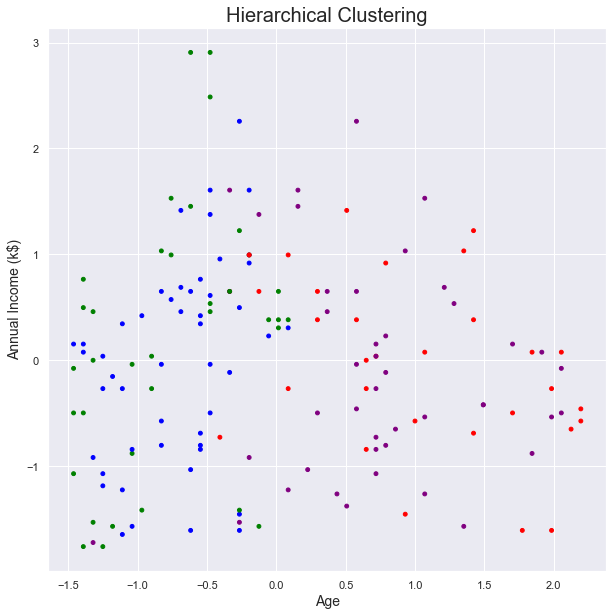

In [220]:
std_train_df['HR_labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,1],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[1],fontsize=14)
plt.show()

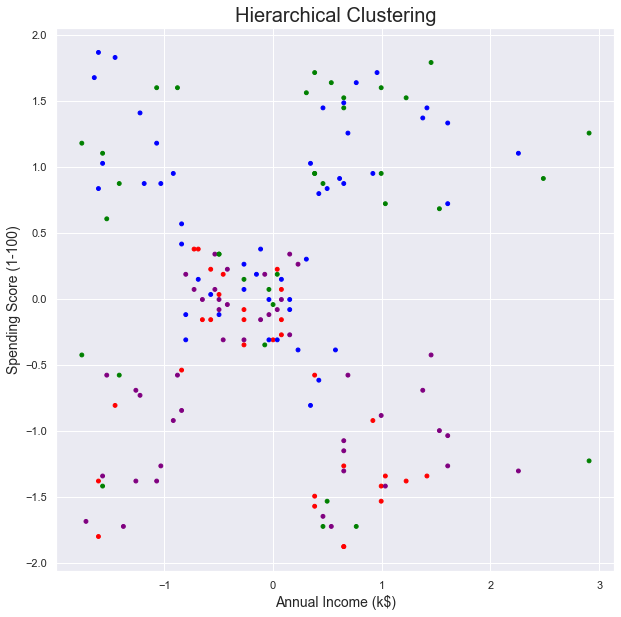

In [221]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,1],std_train_df.iloc[:,2],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[1],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

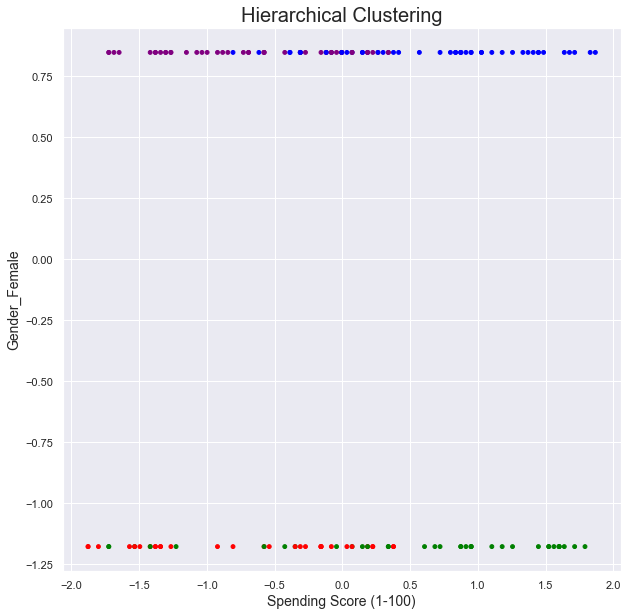

In [222]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,2],std_train_df.iloc[:,3],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[2],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[3],fontsize=14)
plt.show()

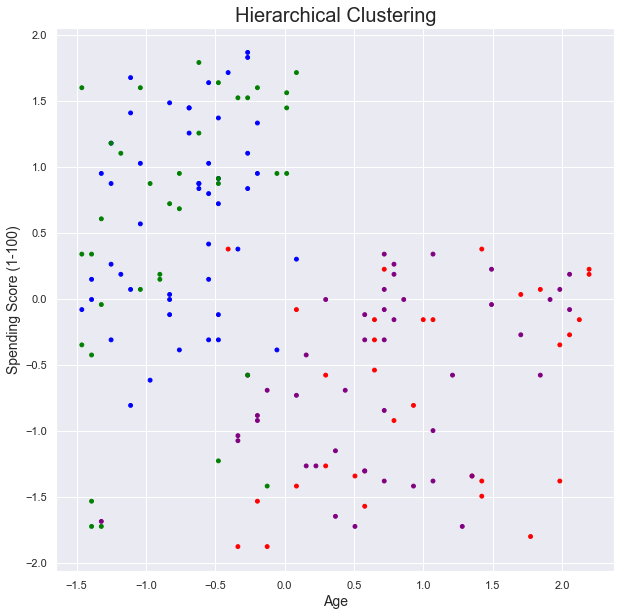

In [223]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,2],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

#### 실루엣 계수 확인
실루엣 계수는 각 데이터별로 그 데이터가 속한 군집 내의 거리기반 유사도와 인접한 군집의 유사도를 비교하는 지표. 0.5보다 크면 타당하다고 판단 가능

In [224]:
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,HR_labels
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159,1
1,-0.688276,0.689191,1.255977,0.848782,-0.848782,2
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159,1
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782,2
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782,0
...,...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782,2
156,-0.477310,2.486249,0.912136,-1.178159,1.178159,4
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782,2
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782,2


In [225]:
mean_score = silhouette_score(std_train_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Female','Gender_Male']], std_train_df['HR_labels'])
print(mean_score)

0.34302442039665965


0.3430으로 증가. 하지만 여전히 0.5보다 작음

- n_cluster = 10

In [256]:
std_train_df.drop(['HR_labels'], axis=1, inplace=True)
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159
1,-0.688276,0.689191,1.255977,0.848782,-0.848782
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782
...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782
156,-0.477310,2.486249,0.912136,-1.178159,1.178159
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782


In [279]:
model = AgglomerativeClustering(n_clusters=10, affinity='euclidean') # 거리 측도:유클리디안, 군집 개수:4개
model.fit(std_train_df)

AgglomerativeClustering(n_clusters=10)

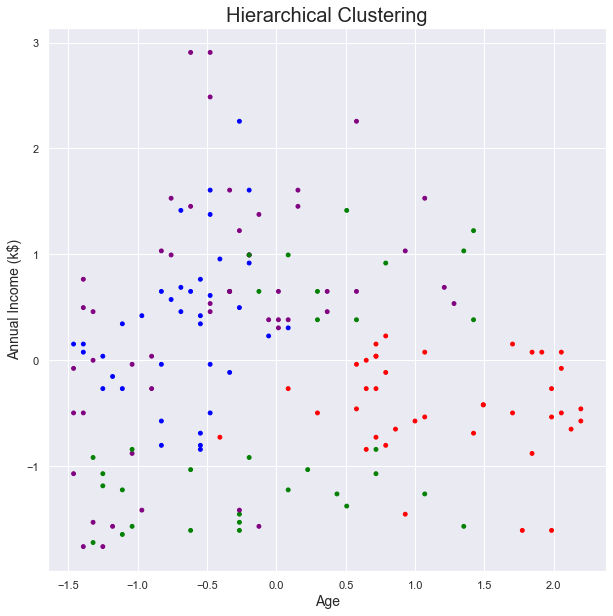

In [280]:
std_train_df['HR_labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,1],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[1],fontsize=14)
plt.show()

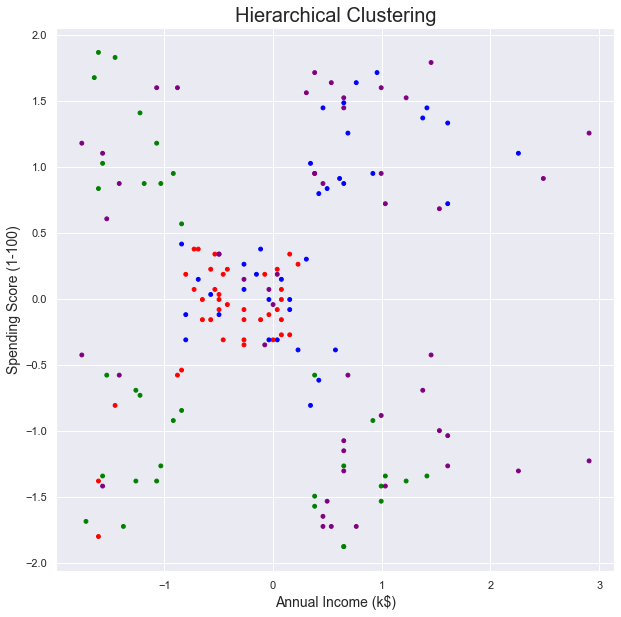

In [281]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,1],std_train_df.iloc[:,2],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[1],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

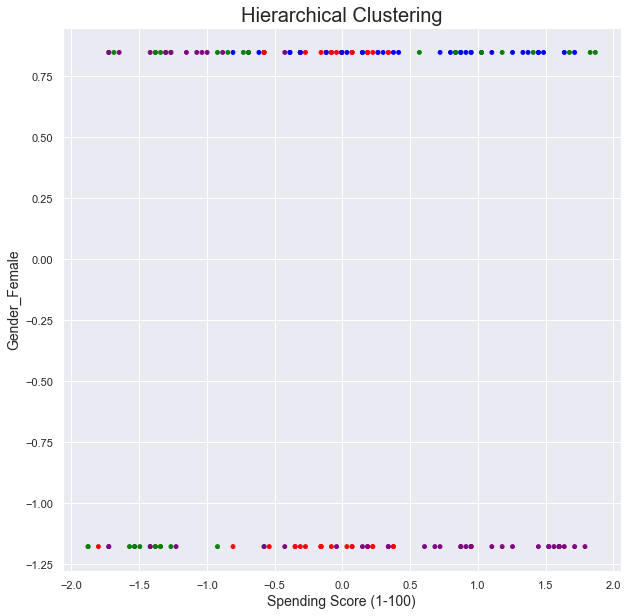

In [282]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,2],std_train_df.iloc[:,3],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[2],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[3],fontsize=14)
plt.show()

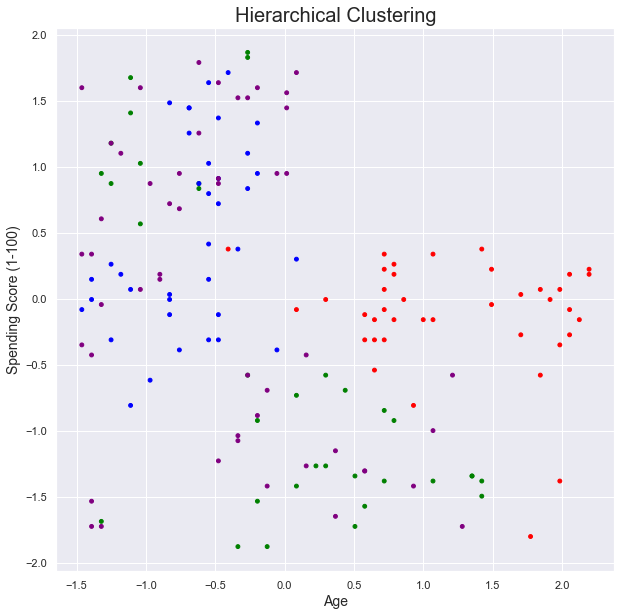

In [283]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,2],c=std_train_df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

#### 실루엣 계수 확인
실루엣 계수는 각 데이터별로 그 데이터가 속한 군집 내의 거리기반 유사도와 인접한 군집의 유사도를 비교하는 지표. 0.5보다 크면 타당하다고 판단 가능

In [284]:
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,HR_labels
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159,3
1,-0.688276,0.689191,1.255977,0.848782,-0.848782,6
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159,3
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782,5
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782,9
...,...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782,5
156,-0.477310,2.486249,0.912136,-1.178159,1.178159,1
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782,5
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782,5


In [285]:
mean_score = silhouette_score(std_train_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Female','Gender_Male']], std_train_df['HR_labels'])
print(mean_score)

0.4171126985836378


0.4171으로 증가. 하지만 여전히 0.5보다 작음. 클러스터 개수를 늘릴수록 실루엣 계수가 증가하는 것을 확인

In [293]:
print('<Standard Scaler Agglomerative Hierarchical Clustering>')
for n in range(4,31,1):
    std_train_df.drop(['HR_labels'], axis=1, inplace=True)
    model = AgglomerativeClustering(n_clusters=n, affinity='euclidean') # 거리 측도:유클리디안, 군집 개수:4개
    model.fit(std_train_df)
    std_train_df['HR_labels']=model.labels_
    mean_score = silhouette_score(std_train_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Female','Gender_Male']], std_train_df['HR_labels'])
    print(n,'번째 실루엣 계수:',round(mean_score,4))

<Standard Scaler Agglomerative Hierarchical Clustering>
4 번째 실루엣 계수: 0.3208
5 번째 실루엣 계수: 0.343
6 번째 실루엣 계수: 0.3546
7 번째 실루엣 계수: 0.3721
8 번째 실루엣 계수: 0.3771
9 번째 실루엣 계수: 0.3915
10 번째 실루엣 계수: 0.4171
11 번째 실루엣 계수: 0.4213
12 번째 실루엣 계수: 0.4274
13 번째 실루엣 계수: 0.4176
14 번째 실루엣 계수: 0.4269
15 번째 실루엣 계수: 0.4393
16 번째 실루엣 계수: 0.4522
17 번째 실루엣 계수: 0.4433
18 번째 실루엣 계수: 0.4359
19 번째 실루엣 계수: 0.4226
20 번째 실루엣 계수: 0.4164
21 번째 실루엣 계수: 0.4171
22 번째 실루엣 계수: 0.4206
23 번째 실루엣 계수: 0.4198
24 번째 실루엣 계수: 0.4072
25 번째 실루엣 계수: 0.405
26 번째 실루엣 계수: 0.4042
27 번째 실루엣 계수: 0.3997
28 번째 실루엣 계수: 0.3972
29 번째 실루엣 계수: 0.4026
30 번째 실루엣 계수: 0.4024


In [296]:
print('<MinMax Scaler Agglomerative Hierarchical Clustering>')
for n in range(4,31,1):
    if n > 4:
        mm_train_df.drop(['HR_labels'], axis=1, inplace=True)
    model = AgglomerativeClustering(n_clusters=n, affinity='euclidean') # 거리 측도:유클리디안, 군집 개수:4개
    model.fit(mm_train_df)
    mm_train_df['HR_labels']=model.labels_
    mean_score = silhouette_score(mm_train_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Female','Gender_Male']], mm_train_df['HR_labels'])
    print(n,'번째 실루엣 계수:',round(mean_score,4))

<MinMax Scaler Agglomerative Hierarchical Clustering>
4 번째 실루엣 계수: 0.3617
5 번째 실루엣 계수: 0.3687
6 번째 실루엣 계수: 0.3833
7 번째 실루엣 계수: 0.3823
8 번째 실루엣 계수: 0.3844
9 번째 실루엣 계수: 0.4075
10 번째 실루엣 계수: 0.4306
11 번째 실루엣 계수: 0.4268
12 번째 실루엣 계수: 0.4183
13 번째 실루엣 계수: 0.4243
14 번째 실루엣 계수: 0.42
15 번째 실루엣 계수: 0.4337
16 번째 실루엣 계수: 0.4403
17 번째 실루엣 계수: 0.4372
18 번째 실루엣 계수: 0.4412
19 번째 실루엣 계수: 0.4363
20 번째 실루엣 계수: 0.4405
21 번째 실루엣 계수: 0.4281
22 번째 실루엣 계수: 0.4321
23 번째 실루엣 계수: 0.4319
24 번째 실루엣 계수: 0.4168
25 번째 실루엣 계수: 0.4198
26 번째 실루엣 계수: 0.4189
27 번째 실루엣 계수: 0.4136
28 번째 실루엣 계수: 0.4131
29 번째 실루엣 계수: 0.4138
30 번째 실루엣 계수: 0.411


In [297]:
print('<Robust Scaler Agglomerative Hierarchical Clustering>')
for n in range(4,31,1):
    if n > 4:
        rb_train_df.drop(['HR_labels'], axis=1, inplace=True)
    model = AgglomerativeClustering(n_clusters=n, affinity='euclidean') # 거리 측도:유클리디안, 군집 개수:4개
    model.fit(rb_train_df)
    rb_train_df['HR_labels']=model.labels_
    mean_score = silhouette_score(rb_train_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Female','Gender_Male']], rb_train_df['HR_labels'])
    print(n,'번째 실루엣 계수:',round(mean_score,4))

<Robust Scaler Agglomerative Hierarchical Clustering>
4 번째 실루엣 계수: 0.2916
5 번째 실루엣 계수: 0.3159
6 번째 실루엣 계수: 0.3313
7 번째 실루엣 계수: 0.3506
8 번째 실루엣 계수: 0.3689
9 번째 실루엣 계수: 0.3771
10 번째 실루엣 계수: 0.3972
11 번째 실루엣 계수: 0.4079
12 번째 실루엣 계수: 0.4189
13 번째 실루엣 계수: 0.4112
14 번째 실루엣 계수: 0.4195
15 번째 실루엣 계수: 0.433
16 번째 실루엣 계수: 0.4447
17 번째 실루엣 계수: 0.4369
18 번째 실루엣 계수: 0.4304
19 번째 실루엣 계수: 0.4246
20 번째 실루엣 계수: 0.4164
21 번째 실루엣 계수: 0.4173
22 번째 실루엣 계수: 0.4158
23 번째 실루엣 계수: 0.4165
24 번째 실루엣 계수: 0.406
25 번째 실루엣 계수: 0.4077
26 번째 실루엣 계수: 0.4062
27 번째 실루엣 계수: 0.4039
28 번째 실루엣 계수: 0.4001
29 번째 실루엣 계수: 0.4053
30 번째 실루엣 계수: 0.4024


Standard Scaler 데이터셋에 클러스터 개수가 16개일 때 실루엣 계수가 0.4522로 가장 높았다. 

### 2.2 K-Means Clustering

In [299]:
std_train_df.drop(['HR_labels'], axis=1, inplace=True)
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159
1,-0.688276,0.689191,1.255977,0.848782,-0.848782
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782
...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782
156,-0.477310,2.486249,0.912136,-1.178159,1.178159
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782


In [301]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=808)
k_means.fit(std_train_df)

KMeans(n_clusters=4, random_state=808)

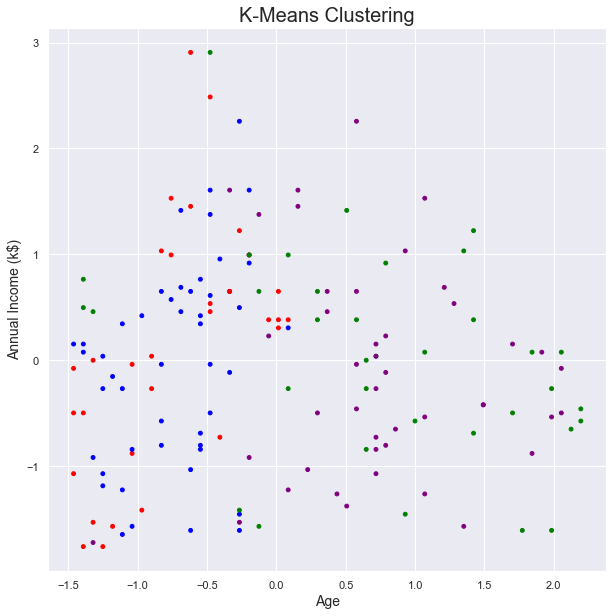

In [303]:
std_train_df['KMeans_labels']=k_means.labels_

plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,1],c=std_train_df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[1],fontsize=14)
plt.show()

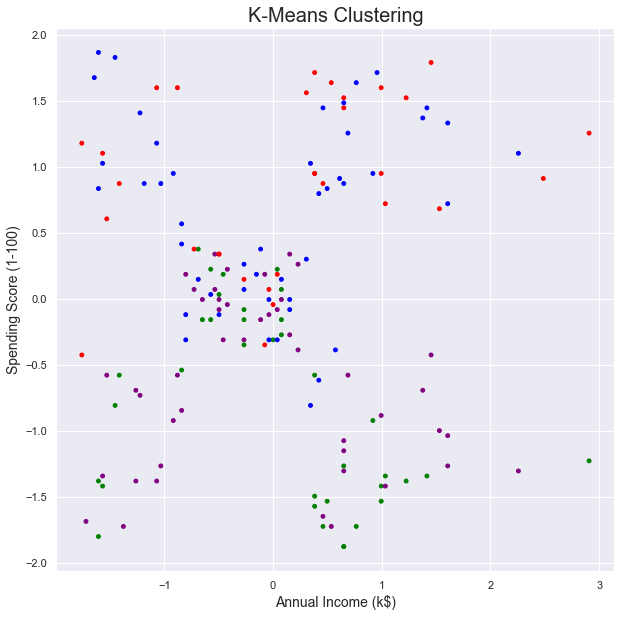

In [304]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,1],std_train_df.iloc[:,2],c=std_train_df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[1],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

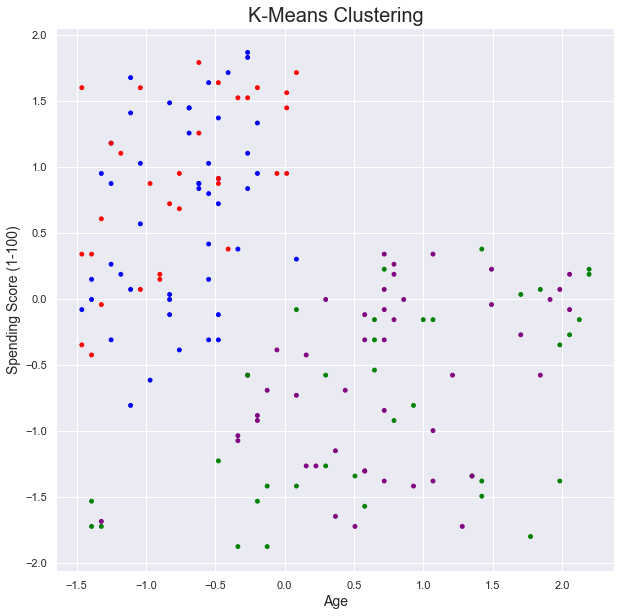

In [305]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,2],c=std_train_df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

In [353]:
print('<Standard Scaler Agglomerative K-means Clustering>')
for n in range(4,31,1):
    if n > 4:
        std_train_df.drop(['KMeans_labels'], axis=1, inplace=True)
    k_means=KMeans(n_clusters=n,random_state=808)
    k_means.fit(std_train_df)
    std_train_df['KMeans_labels']=k_means.labels_
    mean_score = silhouette_score(std_train_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Female','Gender_Male']], std_train_df['KMeans_labels'])
    print(n,'번째 실루엣 계수:',round(mean_score,4))

<Standard Scaler Agglomerative K-means Clustering>
4 번째 실루엣 계수: -0.0503
5 번째 실루엣 계수: 0.002
6 번째 실루엣 계수: -0.0002
7 번째 실루엣 계수: -0.0027
8 번째 실루엣 계수: -0.006
9 번째 실루엣 계수: -0.0138
10 번째 실루엣 계수: 0.0022
11 번째 실루엣 계수: 0.0206
12 번째 실루엣 계수: 0.0694
13 번째 실루엣 계수: 0.098
14 번째 실루엣 계수: 0.1217
15 번째 실루엣 계수: 0.1047
16 번째 실루엣 계수: 0.139
17 번째 실루엣 계수: 0.1242
18 번째 실루엣 계수: 0.1267
19 번째 실루엣 계수: 0.1504
20 번째 실루엣 계수: 0.1808
21 번째 실루엣 계수: 0.1899
22 번째 실루엣 계수: 0.219
23 번째 실루엣 계수: 0.2328
24 번째 실루엣 계수: 0.2566
25 번째 실루엣 계수: 0.2635
26 번째 실루엣 계수: 0.2793
27 번째 실루엣 계수: 0.2765
28 번째 실루엣 계수: 0.2869
29 번째 실루엣 계수: 0.2959
30 번째 실루엣 계수: 0.2635


In [354]:
print('<MinMax Scaler Agglomerative K-means Clustering>')
for n in range(4,31,1):
    if n > 4:
        mm_train_df.drop(['KMeans_labels'], axis=1, inplace=True)
    k_means=KMeans(n_clusters=n,random_state=808)
    k_means.fit(mm_train_df)
    mm_train_df['KMeans_labels']=k_means.labels_
    mean_score = silhouette_score(mm_train_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Female','Gender_Male']], mm_train_df['KMeans_labels'])
    print(n,'번째 실루엣 계수:',round(mean_score,4))

<MinMax Scaler Agglomerative K-means Clustering>
4 번째 실루엣 계수: -0.0299
5 번째 실루엣 계수: -0.0235
6 번째 실루엣 계수: -0.1615
7 번째 실루엣 계수: -0.1927
8 번째 실루엣 계수: -0.1938
9 번째 실루엣 계수: -0.1666
10 번째 실루엣 계수: -0.2086
11 번째 실루엣 계수: -0.1846
12 번째 실루엣 계수: -0.1407
13 번째 실루엣 계수: -0.1322
14 번째 실루엣 계수: -0.1493
15 번째 실루엣 계수: -0.1415
16 번째 실루엣 계수: -0.12
17 번째 실루엣 계수: -0.0932
18 번째 실루엣 계수: -0.0982
19 번째 실루엣 계수: -0.0258
20 번째 실루엣 계수: -0.0272
21 번째 실루엣 계수: 0.0497
22 번째 실루엣 계수: 0.0729
23 번째 실루엣 계수: 0.1639
24 번째 실루엣 계수: 0.1701
25 번째 실루엣 계수: 0.2141
26 번째 실루엣 계수: 0.2012
27 번째 실루엣 계수: 0.2328
28 번째 실루엣 계수: 0.2682
29 번째 실루엣 계수: 0.2852
30 번째 실루엣 계수: 0.3235


In [355]:
print('<Robust Scaler Agglomerative K-means Clustering>')
for n in range(4,31,1):
    if n > 4:
        rb_train_df.drop(['KMeans_labels'], axis=1, inplace=True)
    k_means=KMeans(n_clusters=n,random_state=808)
    k_means.fit(rb_train_df)
    rb_train_df['KMeans_labels']=k_means.labels_
    mean_score = silhouette_score(rb_train_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Female','Gender_Male']], rb_train_df['KMeans_labels'])
    print(n,'번째 실루엣 계수:',round(mean_score,4))

<Robust Scaler Agglomerative K-means Clustering>
4 번째 실루엣 계수: 0.0497
5 번째 실루엣 계수: 0.0024
6 번째 실루엣 계수: 0.0073
7 번째 실루엣 계수: 0.0327
8 번째 실루엣 계수: -0.0024
9 번째 실루엣 계수: 0.031
10 번째 실루엣 계수: 0.0516
11 번째 실루엣 계수: 0.0699
12 번째 실루엣 계수: 0.0651
13 번째 실루엣 계수: 0.0787
14 번째 실루엣 계수: 0.0824
15 번째 실루엣 계수: 0.1439
16 번째 실루엣 계수: 0.1811
17 번째 실루엣 계수: 0.1607
18 번째 실루엣 계수: 0.1765
19 번째 실루엣 계수: 0.2176
20 번째 실루엣 계수: 0.2375
21 번째 실루엣 계수: 0.2657
22 번째 실루엣 계수: 0.2843
23 번째 실루엣 계수: 0.3043
24 번째 실루엣 계수: 0.3398
25 번째 실루엣 계수: 0.3497
26 번째 실루엣 계수: 0.3687
27 번째 실루엣 계수: 0.3735
28 번째 실루엣 계수: 0.3942
29 번째 실루엣 계수: 0.3993
30 번째 실루엣 계수: 0.4024


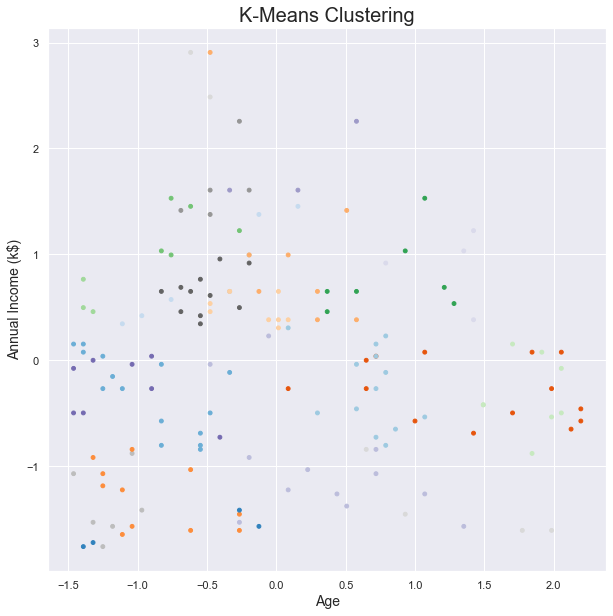

In [314]:
k_means=KMeans(n_clusters=21,random_state=808)
k_means.fit(std_train_df)

std_train_df['KMeans_labels']=k_means.labels_

plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,1],c=std_train_df['KMeans_labels'],cmap='tab20c',s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[1],fontsize=14)
plt.show()

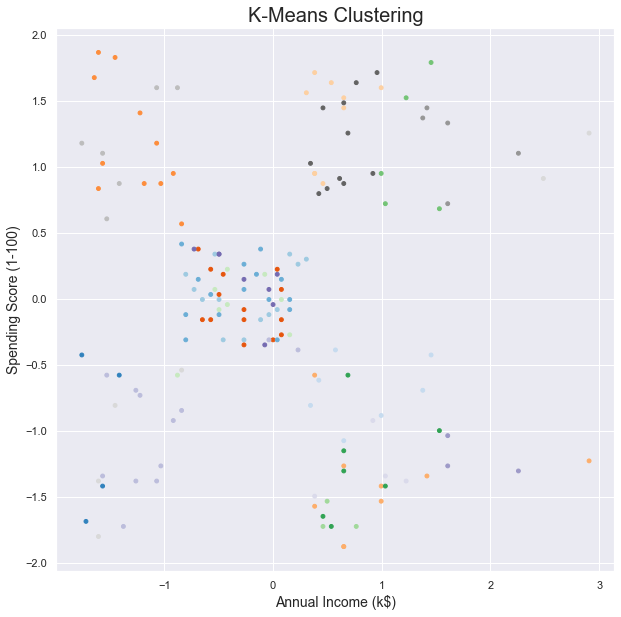

In [315]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,1],std_train_df.iloc[:,2],c=std_train_df['KMeans_labels'],cmap='tab20c',s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[1],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

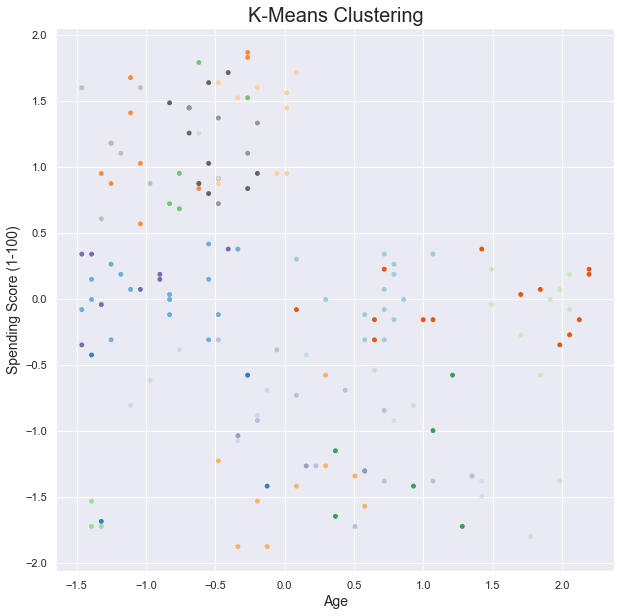

In [316]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,2],c=std_train_df['KMeans_labels'],cmap='tab20c',s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

Standard Scaler를 사용하고 클러스터 개수가 21개일 때 실루엣 계수가 0.427로 가장 높았다. 이는 hierarchical clustering 보다 결과가 안좋은 수치로 plot으로 나타냈을 때에도 집단을 정확하게 분류하는 것 같아 보이지 않았다. 이유는 데이터의 모양이 복잡하기 때문일 수 있다고 생각했다.

### 2.3 DBSCAN

In [317]:
std_train_df.drop(['KMeans_labels'], axis=1, inplace=True)
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159
1,-0.688276,0.689191,1.255977,0.848782,-0.848782
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782
...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782
156,-0.477310,2.486249,0.912136,-1.178159,1.178159
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782


In [318]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN() # eps = 0.5 / min_samples = 5
dbscan.fit(std_train_df)

DBSCAN()

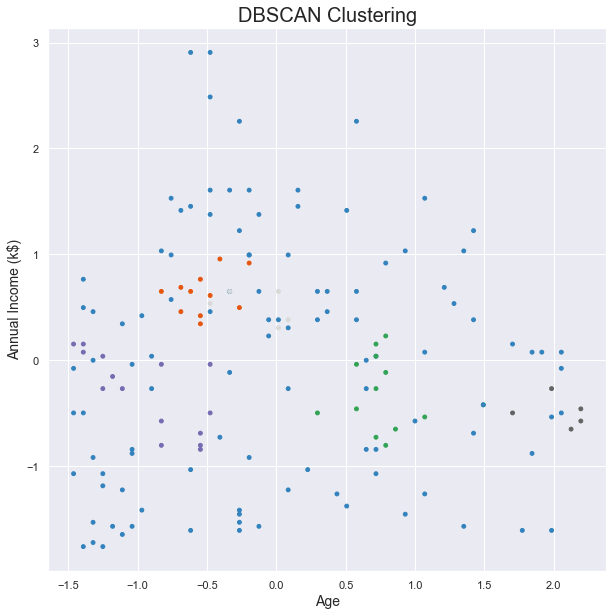

In [320]:
std_train_df['DBSCAN_labels']=dbscan.labels_ 

plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,1],c=std_train_df['DBSCAN_labels'],cmap='tab20c',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[1],fontsize=14)
plt.show()

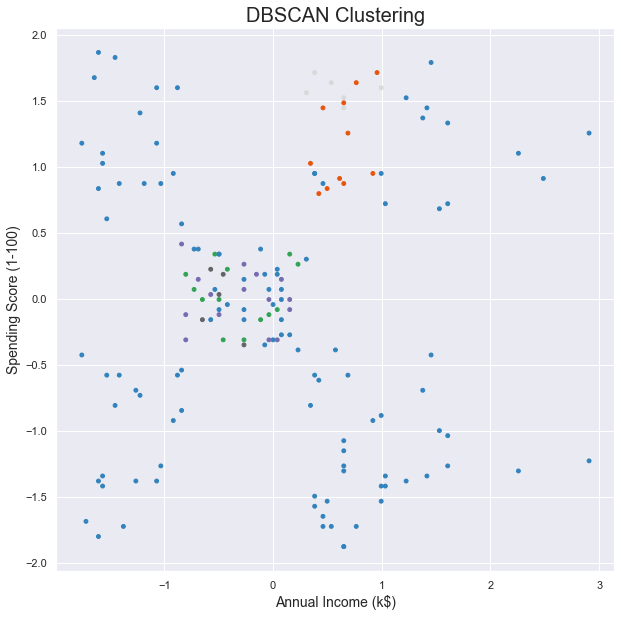

In [321]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,1],std_train_df.iloc[:,2],c=std_train_df['DBSCAN_labels'],cmap='tab20c',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[1],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

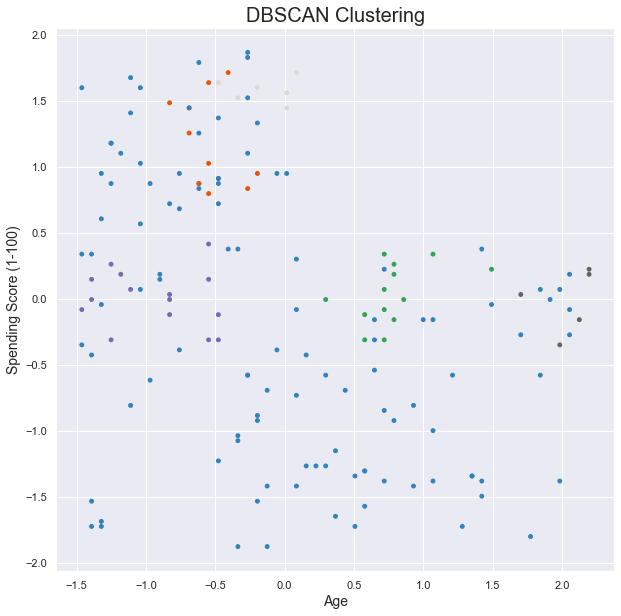

In [322]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,2],c=std_train_df['DBSCAN_labels'],cmap='tab20c',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

**Hyperparameter tuning**
- Elbow Method

#### Standard Scaler

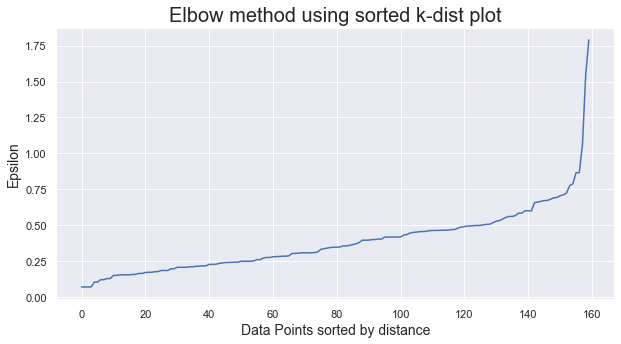

In [324]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(std_train_df)
distances, indices = neighbors.kneighbors(std_train_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

+ eps = 0.625
+ min_samples = 6

In [325]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.625,min_samples=6)
dbscan_opt.fit(std_train_df)

DBSCAN(eps=0.625, min_samples=6)

In [326]:
std_train_df['DBSCAN_opt_labels']=dbscan_opt.labels_
std_train_df['DBSCAN_opt_labels'].value_counts()

# 0,1,2는 세 개의 다른 클러스터, -1은 노이즈

-1    103
 3     15
 2     12
 1     11
 4      7
 5      6
 0      6
Name: DBSCAN_opt_labels, dtype: int64

노이즈가 103으로 매우 많았다. 따라서 hyper parameter 수정 필요

In [331]:
dbscan_opt=DBSCAN(eps=0.625,min_samples=4)
dbscan_opt.fit(std_train_df)

DBSCAN(eps=0.625, min_samples=4)

In [332]:
std_train_df['DBSCAN_opt_labels']=dbscan_opt.labels_
std_train_df['DBSCAN_opt_labels'].value_counts()

# 0,1,2는 세 개의 다른 클러스터, -1은 노이즈

-1     54
 5     15
 4     12
 1     11
 8      7
 9      6
 7      6
 0      6
 12     6
 14     6
 10     5
 11     5
 2      5
 15     4
 6      4
 3      4
 13     4
Name: DBSCAN_opt_labels, dtype: int64

#### MinMax Scaler

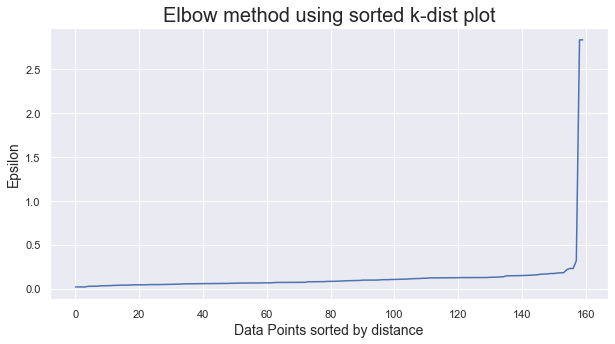

In [333]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(mm_train_df)
distances, indices = neighbors.kneighbors(mm_train_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

+ eps = 0.25
+ min_samples = 6

In [334]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.25,min_samples=6)
dbscan_opt.fit(mm_train_df)

DBSCAN(eps=0.25, min_samples=6)

In [335]:
mm_train_df['DBSCAN_opt_labels']=dbscan_opt.labels_
mm_train_df['DBSCAN_opt_labels'].value_counts()

# 0,1,2는 세 개의 다른 클러스터, -1은 노이즈

-1     48
 4     12
 7     11
 1     11
 9      9
 2      8
 11     8
 8      8
 13     7
 5      7
 3      7
 12     6
 10     6
 6      6
 0      6
Name: DBSCAN_opt_labels, dtype: int64

min_samples를 6으로 똑같이 설정하였을 때 Standard Scaler를 사용한 데이터보다 노이즈 개수가 작음을 확인할 수 있었다.

In [336]:
dbscan_opt=DBSCAN(eps=0.25,min_samples=4)
dbscan_opt.fit(mm_train_df)

DBSCAN(eps=0.25, min_samples=4)

In [337]:
mm_train_df['DBSCAN_opt_labels']=dbscan_opt.labels_
mm_train_df['DBSCAN_opt_labels'].value_counts()

# 0,1,2는 세 개의 다른 클러스터, -1은 노이즈

-1     26
 7     12
 1     11
 12    11
 10     9
 4      8
 13     8
 18     8
 6      7
 8      7
 5      7
 0      6
 11     6
 14     6
 16     6
 2      5
 9      5
 15     4
 3      4
 17     4
Name: DBSCAN_opt_labels, dtype: int64

min_samples가 4일 때 노이즈가 가장 적었다.

#### Robust Scaler

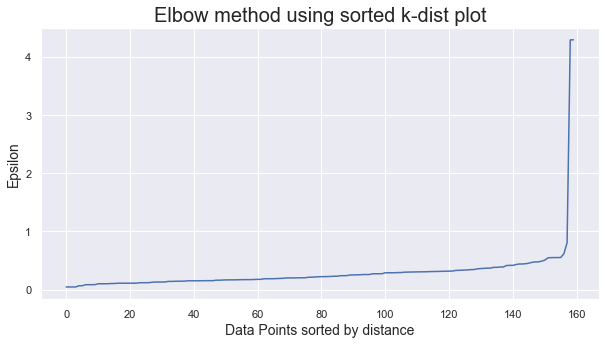

In [339]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(rb_train_df)
distances, indices = neighbors.kneighbors(rb_train_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

+ eps = 0.6
+ min_samples = 6

In [340]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.6,min_samples=6)
dbscan_opt.fit(rb_train_df)

DBSCAN(eps=0.6, min_samples=6)

In [341]:
rb_train_df['DBSCAN_opt_labels']=dbscan_opt.labels_
rb_train_df['DBSCAN_opt_labels'].value_counts()

# 0,1,2는 세 개의 다른 클러스터, -1은 노이즈

-1     55
 3     13
 0     11
 7      9
 6      9
 1      8
 8      8
 5      8
 10     7
 4      7
 2      7
 12     6
 11     6
 9      6
Name: DBSCAN_opt_labels, dtype: int64

min_samples를 6으로 똑같이 설정하였을 때 Standard Scaler를 사용한 데이터보다 노이즈 개수가 적지만 MinMax Scaler보다는 높았다.

In [342]:
dbscan_opt=DBSCAN(eps=0.25,min_samples=4)
dbscan_opt.fit(rb_train_df)

DBSCAN(eps=0.25, min_samples=4)

In [343]:
rb_train_df['DBSCAN_opt_labels']=dbscan_opt.labels_
rb_train_df['DBSCAN_opt_labels'].value_counts()

# 0,1,2는 세 개의 다른 클러스터, -1은 노이즈

-1    127
 0      9
 3      7
 1      5
 5      4
 4      4
 2      4
Name: DBSCAN_opt_labels, dtype: int64

min_samples가 4일 때는 오히려 노이즈가 증가함.

DBSCAN 방법에서 최종적으로 MinMax Scaler를 사용하여 epsilon = 0.25, min_samples=4로 설정했을 때 노이즈가 가장 적었다.

In [348]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.25,min_samples=4)
dbscan_opt.fit(mm_train_df)

DBSCAN(eps=0.25, min_samples=4)

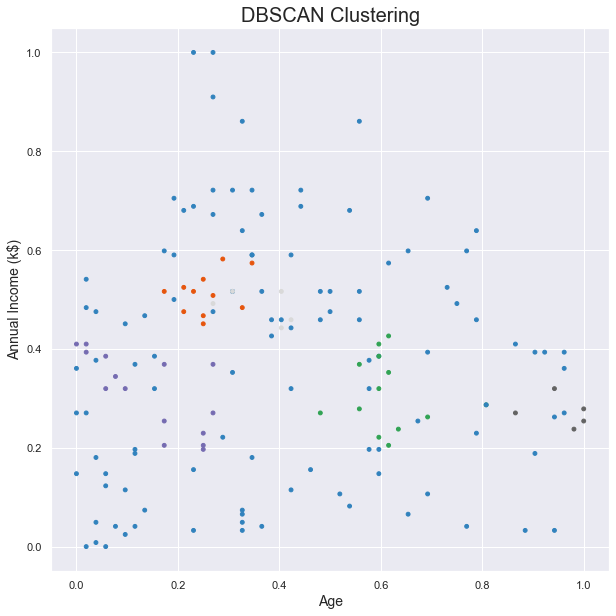

In [350]:
mm_train_df['DBSCAN_labels']=dbscan.labels_ 

plt.figure(figsize=(10,10))
plt.scatter(mm_train_df.iloc[:,0],mm_train_df.iloc[:,1],c=mm_train_df['DBSCAN_labels'],cmap='tab20c',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('%s'%mm_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%mm_train_df.columns[1],fontsize=14)
plt.show()

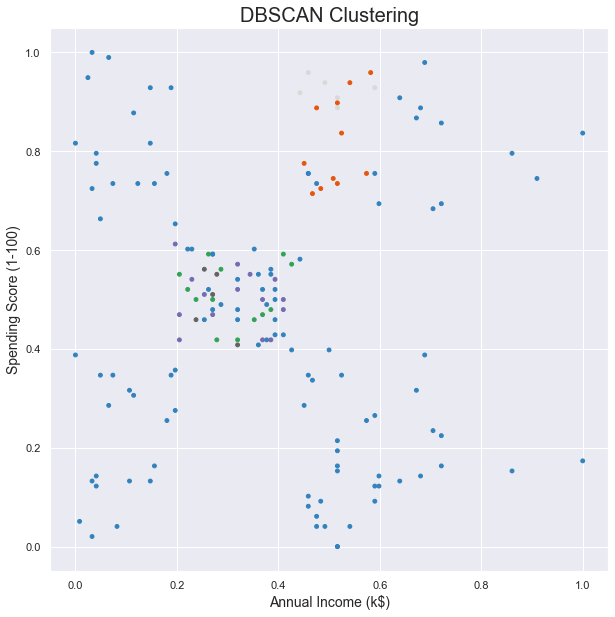

In [351]:
plt.figure(figsize=(10,10))
plt.scatter(mm_train_df.iloc[:,1],mm_train_df.iloc[:,2],c=mm_train_df['DBSCAN_labels'],cmap='tab20c',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('%s'%mm_train_df.columns[1],fontsize=14)
plt.ylabel('%s'%mm_train_df.columns[2],fontsize=14)
plt.show()

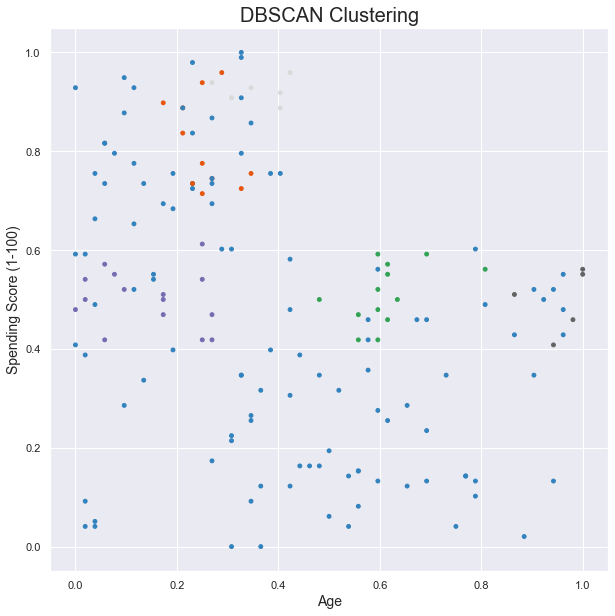

In [352]:
plt.figure(figsize=(10,10))
plt.scatter(mm_train_df.iloc[:,0],mm_train_df.iloc[:,2],c=mm_train_df['DBSCAN_labels'],cmap='tab20c',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('%s'%mm_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%mm_train_df.columns[2],fontsize=14)
plt.show()

## 5. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

- Standard Scaler, K-means Clustering, n_cluster = 21

In [375]:
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,HR_labels
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159,12
1,-0.688276,0.689191,1.255977,0.848782,-0.848782,6
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159,12
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782,5
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782,4
...,...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782,5
156,-0.477310,2.486249,0.912136,-1.178159,1.178159,1
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782,5
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782,5


In [376]:
std_train_df.drop(['HR_labels'], axis=1, inplace=True)
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159
1,-0.688276,0.689191,1.255977,0.848782,-0.848782
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782
...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782
156,-0.477310,2.486249,0.912136,-1.178159,1.178159
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782


In [377]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=21,random_state=808)
k_means.fit(std_train_df)

KMeans(n_clusters=21, random_state=808)

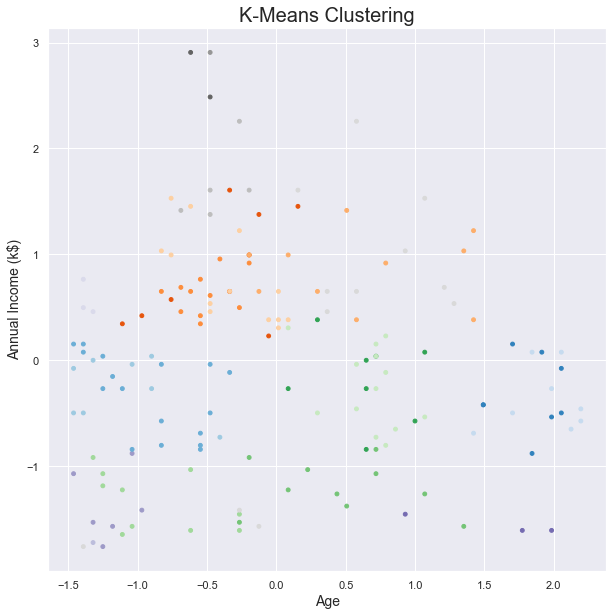

In [380]:
std_train_df['KMeans_labels']=k_means.labels_

plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,1],c=std_train_df['KMeans_labels'],cmap='tab20c',s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[1],fontsize=14)
plt.show()

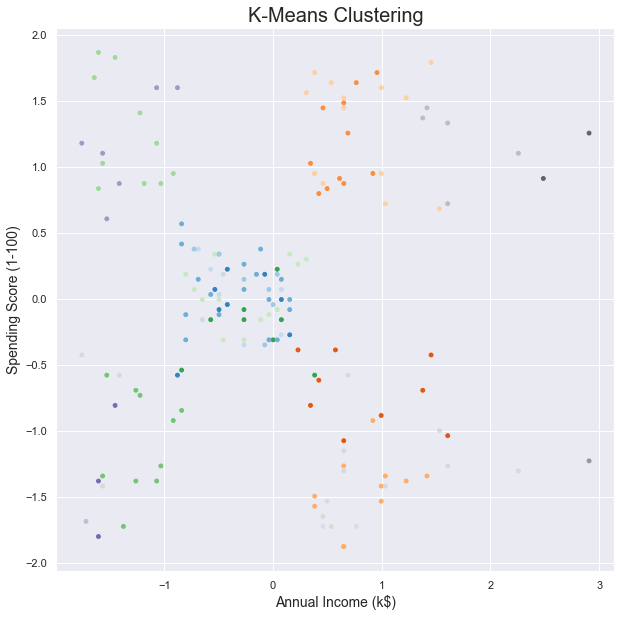

In [381]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,1],std_train_df.iloc[:,2],c=std_train_df['KMeans_labels'],cmap='tab20c',s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[1],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

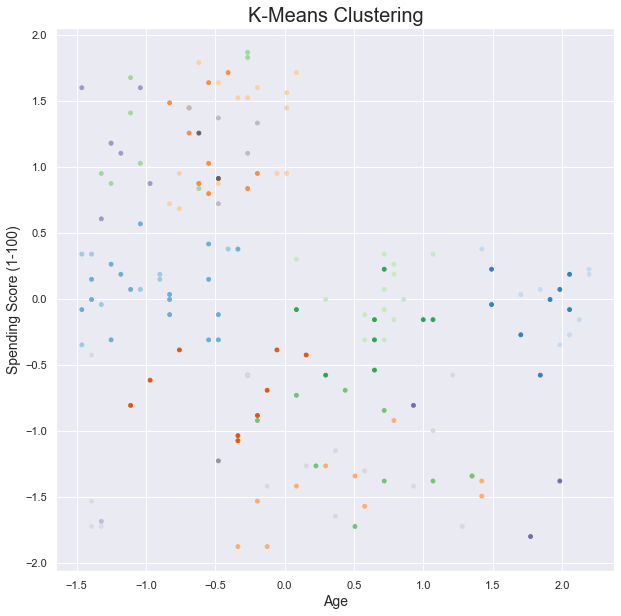

In [382]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,2],c=std_train_df['KMeans_labels'],cmap='tab20c',s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

#### **실루엣 계수가 가장 높은 clustering**
- Standard Scaler, Hierachical Clustering, n_cluster = 16

In [367]:
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,DBSCAN_labels,DBSCAN_opt_labels,KMeans_labels
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159,-1,0,26
1,-0.688276,0.689191,1.255977,0.848782,-0.848782,0,1,4
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159,-1,0,26
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782,-1,-1,10
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782,-1,10,20
...,...,...,...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782,-1,-1,10
156,-0.477310,2.486249,0.912136,-1.178159,1.178159,-1,-1,22
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782,2,5,3
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782,-1,-1,10


In [369]:
std_train_df.drop(['DBSCAN_labels','DBSCAN_opt_labels','KMeans_labels'], axis=1, inplace=True)
std_train_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.647841,-0.266691,-0.157594,-1.178159,1.178159
1,-0.688276,0.689191,1.255977,0.848782,-0.848782
2,0.085265,-0.266691,-0.081185,-1.178159,1.178159
3,-0.336666,-0.113750,0.377271,0.848782,-0.848782
4,1.069772,-1.260808,-1.380143,0.848782,-0.848782
...,...,...,...,...,...
155,-0.758598,0.574485,-0.386822,0.848782,-0.848782
156,-0.477310,2.486249,0.912136,-1.178159,1.178159
157,-1.250851,-0.266691,0.262657,0.848782,-0.848782
158,-0.055379,0.230368,-0.386822,0.848782,-0.848782


In [370]:
model = AgglomerativeClustering(n_clusters=16, affinity='euclidean') # 거리 측도:유클리디안, 군집 개수:4개
model.fit(std_train_df)

AgglomerativeClustering(n_clusters=16)

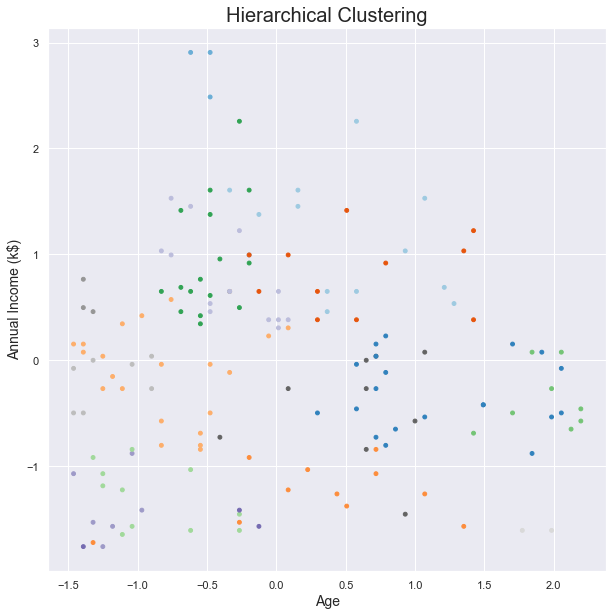

In [371]:
std_train_df['HR_labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,1],c=std_train_df['HR_labels'],cmap='tab20c',s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[1],fontsize=14)
plt.show()

연한 연두색, 노란색, 주황색 집단은 대체로 연봉이 낮고, 초록색, 빨간색, 연하늘색 집단은 대체로 연봉이 높은 것을 알 수 있었다. 또한, 연한 연두색 집단이 가장 연령대가 낮으며, 그다음으로 초록색과 회색, 파란색, 연두색 순으로 연령대가 높음을 확인할 수 있었다. 연두색 집단은 연령대가 가장 높고 연봉이 낮은 편인 집단으로 판단되었고, 연한 연두색 집단은 연령대가 가장 낮고 연봉도 가장 낮은 집단이라고 판단 되었다. 

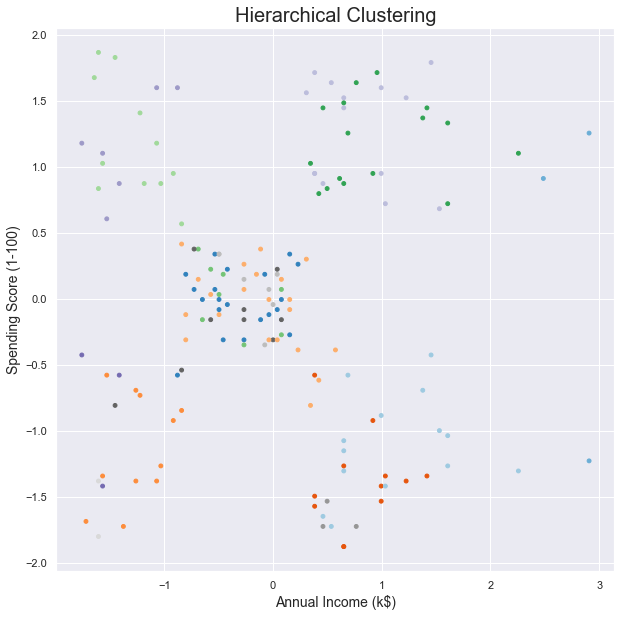

In [372]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,1],std_train_df.iloc[:,2],c=std_train_df['HR_labels'],cmap='tab20c',s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[1],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

위에서 볼 수 있듯이연한 연두색 집단은 연봉이 가장 낮은 집단이었는데 소비지수는 가장 높은 집단임을 확인할 수 있었다. 진한 회색 집단 역시 연한 연두색 집단과 비슷했다. 빨간색 집단은 연봉이 중간 정도이고 소비지수가 가장 낮은 집단이다. 연한 하늘색 집단도 비슷하지만 빨간색 집단보단 연봉이 높고 소비지수도 조금 높은 편임을 알 수 있다. 초록색 집단과 연한 회색 집단은 연봉은 중간~높은 편이며 소비지수가 높은 집단이다. 노란색 집단은 대체로 연봉이 낮으며 소비지수는 적음 ~ 보통 수준임을 확인할 수 있었다.

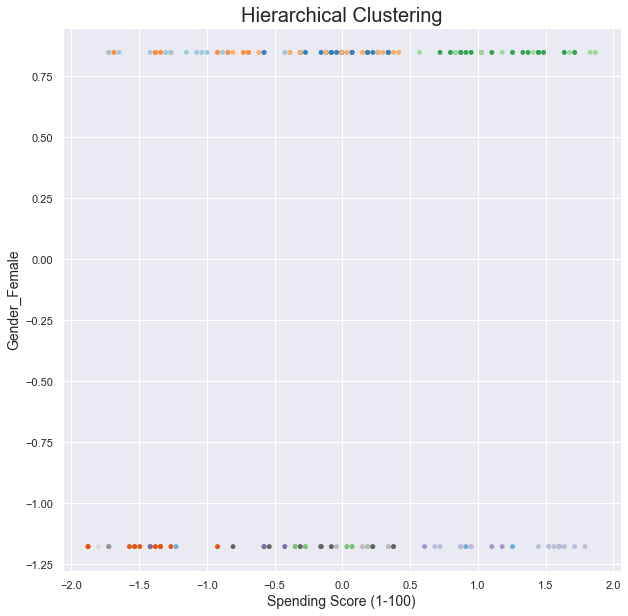

In [373]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,2],std_train_df.iloc[:,3],c=std_train_df['HR_labels'],cmap='tab20c',s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[2],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[3],fontsize=14)
plt.show()

주황색, 노란색, 연한 하늘색, 파랑색, 연한 연두색, 초록색 집단은 성별이 여성인 집단이고, 빨간색, 진한 회색 ,연한 회색, 연두색, 하늘색 집단은 성별이 남성인 집단으로 판단되었다. <br>
성별이 여성인 집단 중에서도 연한 하늘색 집단은 소비지수가 낮았고, 노란색 집단과 파랑색 집단은 소비지수가 보통, 연한 연두색, 초록색집단은 소비지수가 높았다.
<br> 성별이 남성인 집단 중에서는 빨간색인 집단이 소비지수가 낮았으며, 진한 회색, 연두색인 집단이 소비지수가 보통, 연한 회색인 집단이 소비지수가 높은 것을 확인할 수 있었다.

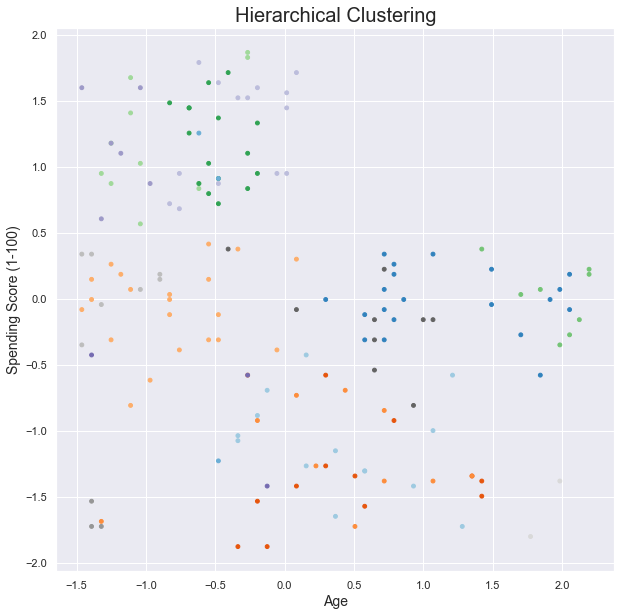

In [374]:
plt.figure(figsize=(10,10))
plt.scatter(std_train_df.iloc[:,0],std_train_df.iloc[:,2],c=std_train_df['HR_labels'],cmap='tab20c',s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('%s'%std_train_df.columns[0],fontsize=14)
plt.ylabel('%s'%std_train_df.columns[2],fontsize=14)
plt.show()

- 연한 연두색 집단 : 연봉이 가장 낮고 소비지수는 가장 높으며 연령대가 가장 낮고 성별이 여성인 집단
- 노란색 집단 : 연봉이 낮고 소비지수가 낮음 ~ 보통이며 성별이 여성인 집단
- 주황색 집단 : 연봉과 소비지수가 낮으며 성별이 여성인 집단
- 초록색 집단 :연봉이 중간 ~ 높음이고 소비지수가 높으며 연령대가 가장 높고 성별이 여성인 집단
- 빨간색 집단 : 연봉이 중간정도이고 소비지수가 가장 낮으며 성별이 남성인 집단
- 연하늘색 집단 : 연봉이 중간정도이고 소비지수가 낮은편이며 성별이 여성인 집단
- 연한 회색 집단 : 연령대가 낮음 ~ 중간이며 성별이 남성인 집단
- 진한 회색 집단 : 연봉이 낮음 ~ 중간이며 소비지수가 낮음 ~ 중간이고 연령대가 중간 ~ 높음이고 성별이 남성인 집단